In [3]:
import json

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()
sns.set_style("dark")
%config InlineBackend.figure_format = 'retina'


## Load extracted features

In [4]:
data_basepath = './n96ncsr5g4-1'
url_features_path = './url_features.json'
html_features_path = './html_features.json'

In [5]:
with open(url_features_path) as f:
    url_features = json.load(f)
    
with open(html_features_path) as f:
    html_features = json.load(f)

In [6]:
features = {}
for k in url_features.keys():
    url_feat = url_features[k]
    html_feat = html_features[k]
    url_feat.update(html_feat)
    features[k] = url_feat

In [7]:
def load_features():
    return pd.DataFrame.from_dict(features, orient='index')


df = load_features()
df.head()

,label,url_length,num_subdomains,uses_https,contains_ip,contains_phishing_keywords,contains_at_symbol,url_depth,is_shortened_url,is_punycode,...,login_form_present,javascript_redirects_present,iframes_count,num_obfuscated_scripts,external_js_inclusion,num_inline_styles,num_script_tags,num_iframe_tags,num_img_tags,num_a_tags
1,1,34,2,False,False,False,False,3,False,False,...,False,False,0,0,False,8,1,0,4,1
2,0,40,3,True,False,False,False,2,False,False,...,False,False,0,0,False,4,4,0,2,7
3,0,48,3,True,False,False,False,3,False,False,...,False,False,0,0,True,3,8,0,5,77
4,0,52,3,True,False,False,False,4,False,False,...,False,False,1,0,False,10,6,1,19,150
5,0,33,4,True,False,False,False,2,False,False,...,False,False,1,1,True,5,17,1,12,58


## Check for missing values

In [8]:
df.isnull().sum()

label                           0
url_length                      0
num_subdomains                  0
uses_https                      0
contains_ip                     0
contains_phishing_keywords      0
contains_at_symbol              0
url_depth                       0
is_shortened_url                0
is_punycode                     0
has_redirection                 0
is_domain_valid                 0
days_until_expiration           0
registration_length             0
num_forms                       0
num_username_fields             0
num_password_fields             0
num_hidden_fields               0
form_action                     0
form_autocomplete               0
external_links_count            0
login_form_present              0
javascript_redirects_present    0
iframes_count                   0
num_obfuscated_scripts          0
external_js_inclusion           0
num_inline_styles               0
num_script_tags                 0
num_iframe_tags                 0
num_img_tags  

## Convert categorical features to one-hot

In [9]:
dummy_feats = pd.get_dummies(df['form_action'], drop_first=True, prefix='form_action')
df = pd.concat([df.drop('form_action', axis=1), dummy_feats], axis=1)
df.head()

,label,url_length,num_subdomains,uses_https,contains_ip,contains_phishing_keywords,contains_at_symbol,url_depth,is_shortened_url,is_punycode,...,num_obfuscated_scripts,external_js_inclusion,num_inline_styles,num_script_tags,num_iframe_tags,num_img_tags,num_a_tags,form_action_1,form_action_2,form_action_3
1,1,34,2,False,False,False,False,3,False,False,...,0,False,8,1,0,4,1,False,False,True
2,0,40,3,True,False,False,False,2,False,False,...,0,False,4,4,0,2,7,False,True,False
3,0,48,3,True,False,False,False,3,False,False,...,0,True,3,8,0,5,77,True,False,False
4,0,52,3,True,False,False,False,4,False,False,...,0,False,10,6,1,19,150,False,True,False
5,0,33,4,True,False,False,False,2,False,False,...,1,True,5,17,1,12,58,False,False,True


In [10]:
df.describe()

,label,url_length,num_subdomains,url_depth,days_until_expiration,registration_length,num_forms,num_username_fields,num_password_fields,num_hidden_fields,form_autocomplete,external_links_count,iframes_count,num_obfuscated_scripts,num_inline_styles,num_script_tags,num_iframe_tags,num_img_tags,num_a_tags
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,0.375000,63.874550,2.856987,3.392425,359.920050,4048.833700,1.417963,0.088600,0.151037,1.577025,0.068675,43.554125,0.397788,0.221775,25.894925,15.921537,0.397788,15.391212,103.576775
std,0.484126,52.473153,0.713576,1.620983,694.261187,4273.156169,3.614887,0.298582,0.380397,24.454961,0.252902,662.820134,1.104001,1.304094,178.350492,23.602287,1.104001,95.012677,700.689991
min,0.000000,13.000000,2.000000,1.000000,-1241.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,38.000000,2.000000,2.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1.000000,3.000000
50%,0.000000,51.000000,3.000000,3.000000,78.000000,2922.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,6.000000,9.000000,0.000000,4.000000,33.000000
75%,1.000000,73.000000,3.000000,4.000000,332.000000,8036.000000,2.000000,0.000000,0.000000,1.000000,0.000000,43.000000,1.000000,0.000000,19.000000,22.000000,1.000000,14.000000,118.000000
max,1.000000,1641.000000,17.000000,29.000000,9582.000000,18993.000000,316.000000,9.000000,10.000000,6138.000000,1.000000,184694.000000,50.000000,203.000000,37213.000000,3101.000000,50.000000,21606.000000,184738.000000


## Split into training and test set

In [11]:
from sklearn.model_selection import train_test_split

X = df.drop('label', axis=1).to_numpy().astype(float)
y = df['label'].to_numpy()

test_size = 0.2
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
print(f'Number of training samples: {X_train.shape}')
print(f'Number of test samples: {X_test.shape}')

Number of training samples: (64000, 32)
Number of test samples: (16000, 32)


# Analysis

In [12]:
sample_df = df.sample(n=1000, random_state=42)

X = sample_df.drop('label', axis=1).to_numpy().astype(float)
y = sample_df['label'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
y = df['label'].to_numpy()

df.to_csv('output_file.csv', index=False)

In [13]:
X_test.shape

(200, 32)

In [14]:
sample_df.describe()

,label,url_length,num_subdomains,url_depth,days_until_expiration,registration_length,num_forms,num_username_fields,num_password_fields,num_hidden_fields,form_autocomplete,external_links_count,iframes_count,num_obfuscated_scripts,num_inline_styles,num_script_tags,num_iframe_tags,num_img_tags,num_a_tags
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.374000,62.801000,2.828000,3.332000,374.937000,4147.400000,1.30900,0.073000,0.125000,1.205000,0.052000,48.396000,0.423000,0.187000,34.510000,16.369000,0.423000,19.663000,121.050000
std,0.484106,67.340405,0.657912,1.601356,708.209869,4256.127644,1.95175,0.260267,0.339839,2.694482,0.222138,133.360933,1.146903,0.796659,144.302693,21.079734,1.146903,176.721764,307.243382
min,0.000000,16.000000,2.000000,1.000000,-60.000000,-1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,36.000000,2.000000,2.000000,-1.000000,-1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1.000000,4.000000
50%,0.000000,50.000000,3.000000,3.000000,92.000000,3287.000000,1.00000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,6.000000,9.000000,0.000000,4.000000,35.000000
75%,1.000000,73.000000,3.000000,4.000000,339.750000,8044.250000,2.00000,0.000000,0.000000,1.000000,0.000000,44.000000,1.000000,0.000000,20.000000,22.000000,1.000000,15.000000,129.000000
max,1.000000,1627.000000,8.000000,17.000000,3589.000000,13880.000000,24.00000,1.000000,2.000000,35.000000,1.000000,1846.000000,18.000000,18.000000,2678.000000,165.000000,18.000000,5531.000000,5482.000000


In [15]:
def plot_grouped_items(dataFrame, columnName, limit=20, bucketSize=1, 
                       title='', x_label='', y_label='Count',
                       labels=['Label 0', 'Label 1']):
    
    columnNameCat = f'{columnName}_category'
    tempDf = dataFrame[[columnName, 'label']]

    # Define the bins for the column with a bucketSize
    bins = [i for i in range(0, limit, bucketSize)] +  [float('inf')]

    # Create labels for each bin
    if bucketSize == 1:
        labels = [f'{str(i)}' for i in range(0, limit-bucketSize, bucketSize)] +  [f'{limit-bucketSize}+'] 
    else:
        labels = [f'{str(i)}-{str(i+bucketSize)}' for i in range(0, limit-bucketSize, bucketSize)] +  [f'{limit-bucketSize}+'] 
    
    # Create a new column 'num_img_tags_category' with the categorized values
    tempDf[columnNameCat] = pd.cut(tempDf[columnName], bins=bins, labels=labels, right=False)

    # Group by num_img_tags and label and count the occurrences
    grouped_data = tempDf.groupby([columnNameCat, 'label']).size().unstack(fill_value=0)


    # Plot stacked bar chart
    ax = grouped_data.plot(kind='bar', stacked=True, figsize=(12, 6), grid=True)

    # Add labels and legend
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.legend(title='Label', labels=['Not Phishing', 'Phishing website'])
    ax.set_title(title)
    
    if len(labels) > 22:
        ax.set_xticks(np.arange(0, 200, 10))
        
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    plt.figure(figsize=(10, 8))
    
    fig1 = plt.gcf()
    plt.show()
    plt.draw()
    fig1.savefig(f'plots/{columnName}_lables_distribution.png', dpi=300)


/var/folders/l2/k_0hhyfd76b__51kf1m_vk_c0000gn/T/ipykernel_14411/1661900798.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempDf[columnNameCat] = pd.cut(tempDf[columnName], bins=bins, labels=labels, right=False)


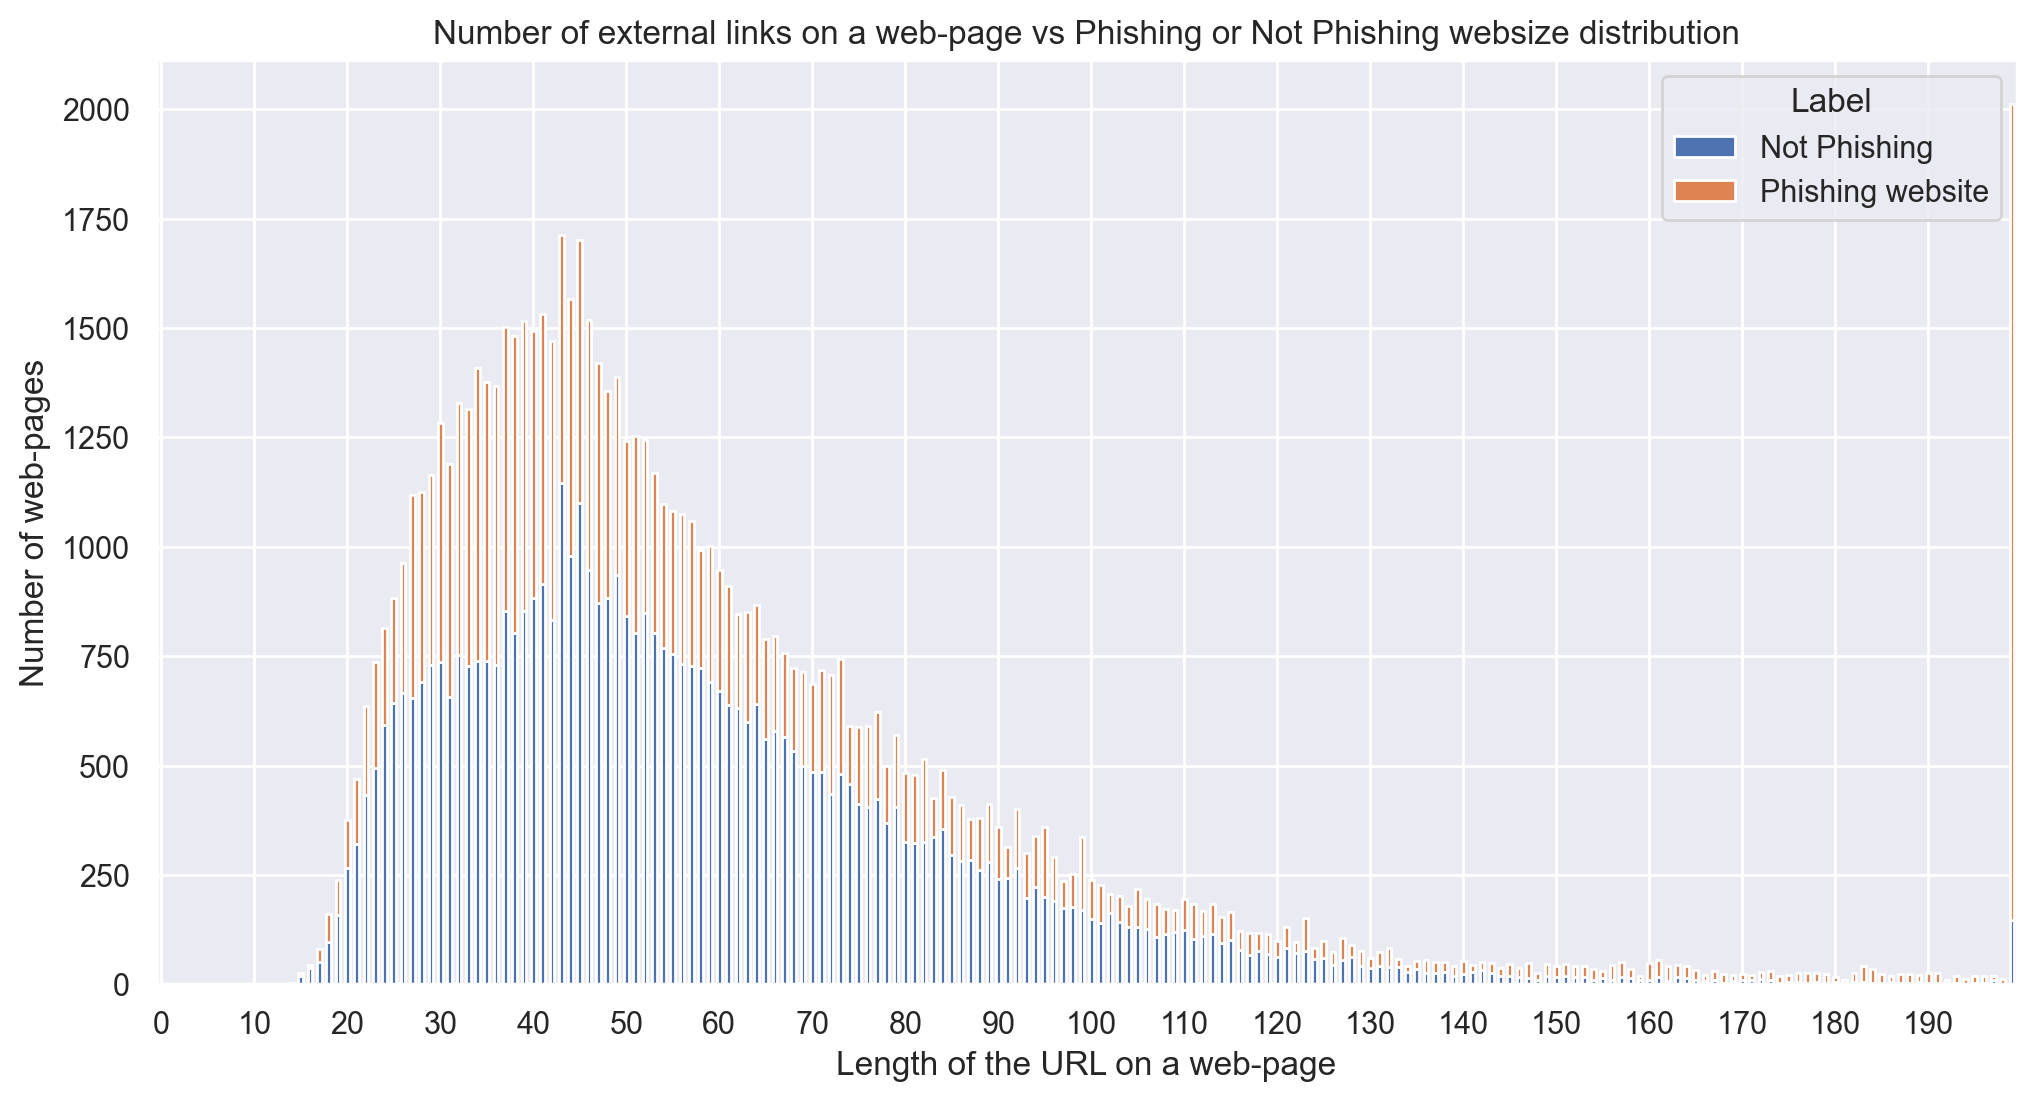

<Figure size 1000x800 with 0 Axes>

/var/folders/l2/k_0hhyfd76b__51kf1m_vk_c0000gn/T/ipykernel_14411/1661900798.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempDf[columnNameCat] = pd.cut(tempDf[columnName], bins=bins, labels=labels, right=False)


<Figure size 640x480 with 0 Axes>

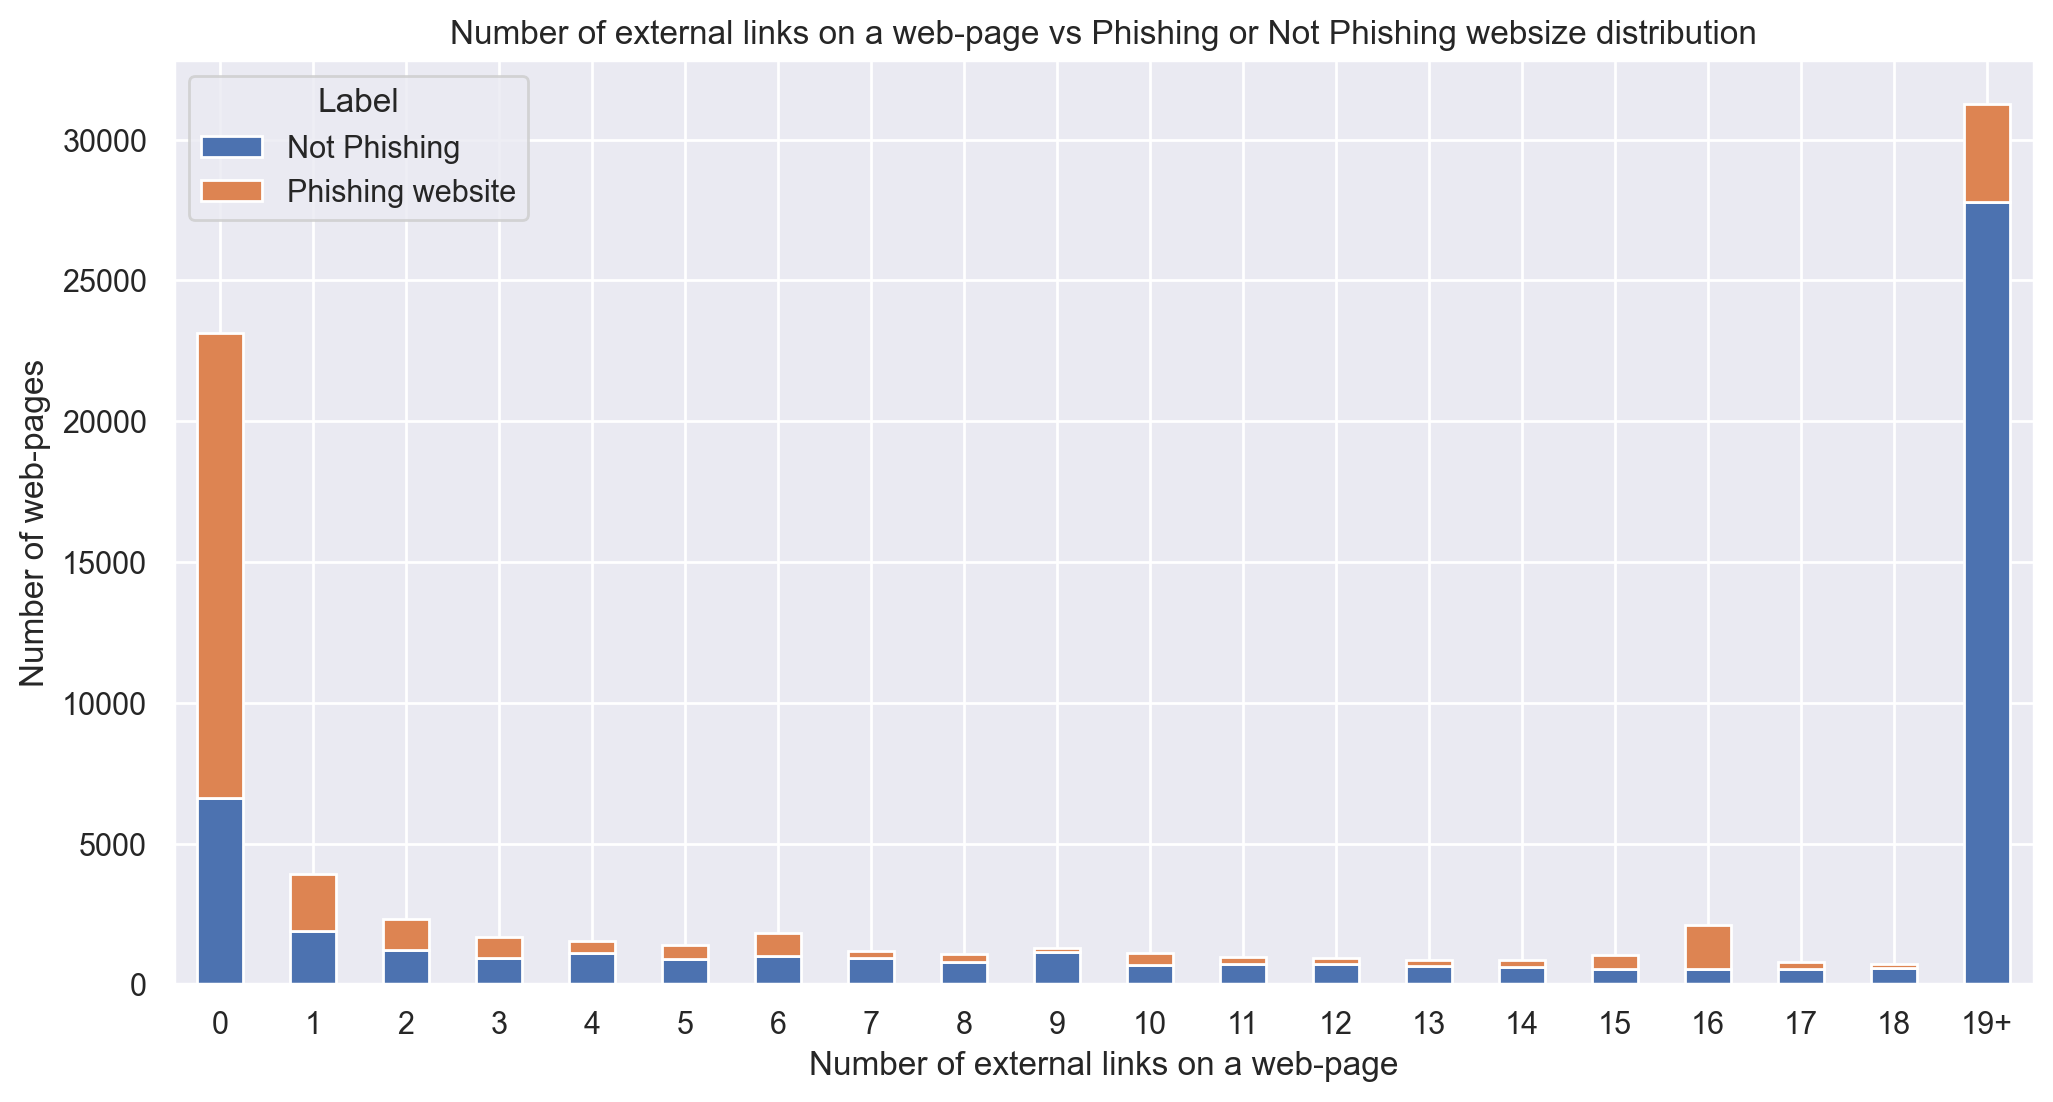

<Figure size 1000x800 with 0 Axes>

/var/folders/l2/k_0hhyfd76b__51kf1m_vk_c0000gn/T/ipykernel_14411/1661900798.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempDf[columnNameCat] = pd.cut(tempDf[columnName], bins=bins, labels=labels, right=False)


<Figure size 640x480 with 0 Axes>

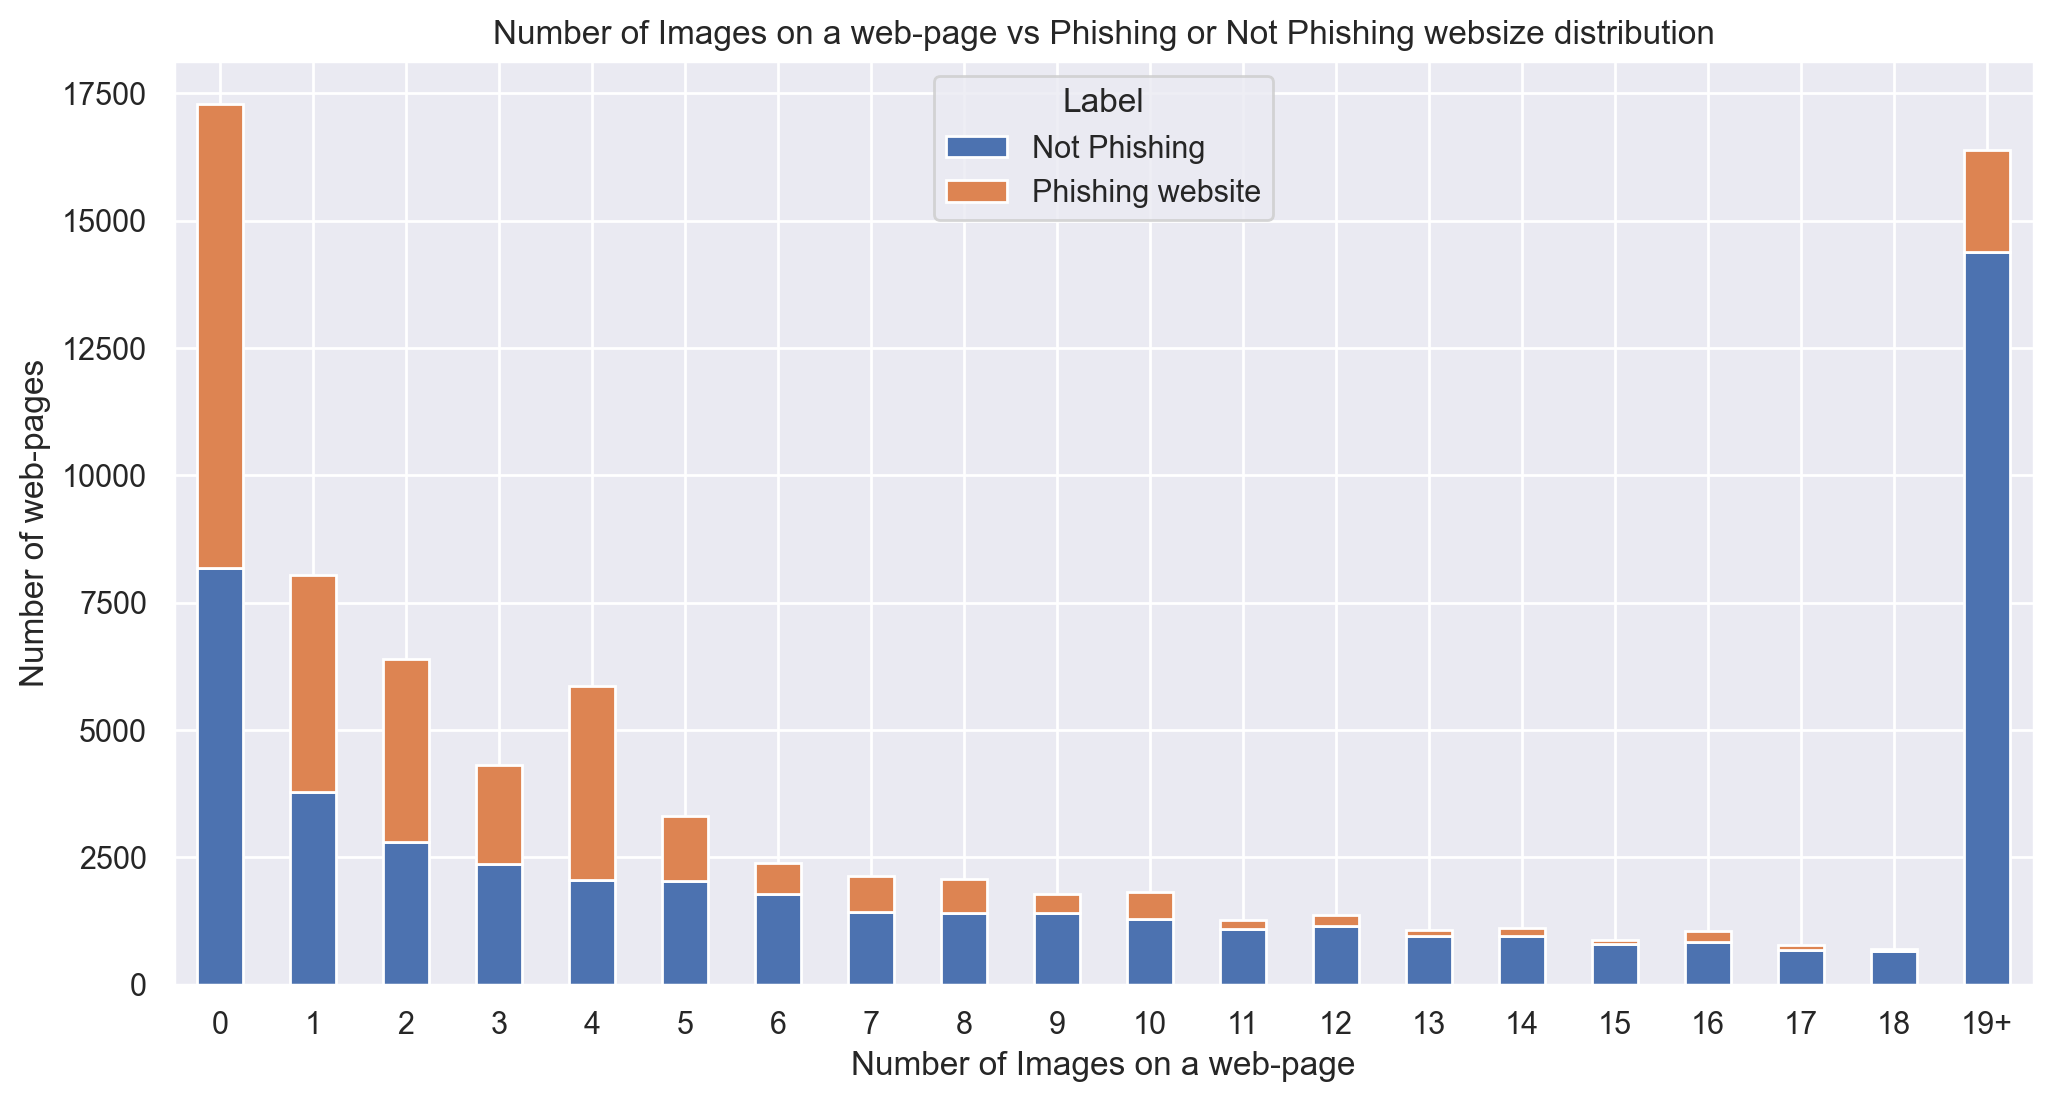

<Figure size 1000x800 with 0 Axes>

/var/folders/l2/k_0hhyfd76b__51kf1m_vk_c0000gn/T/ipykernel_14411/1661900798.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempDf[columnNameCat] = pd.cut(tempDf[columnName], bins=bins, labels=labels, right=False)


<Figure size 640x480 with 0 Axes>

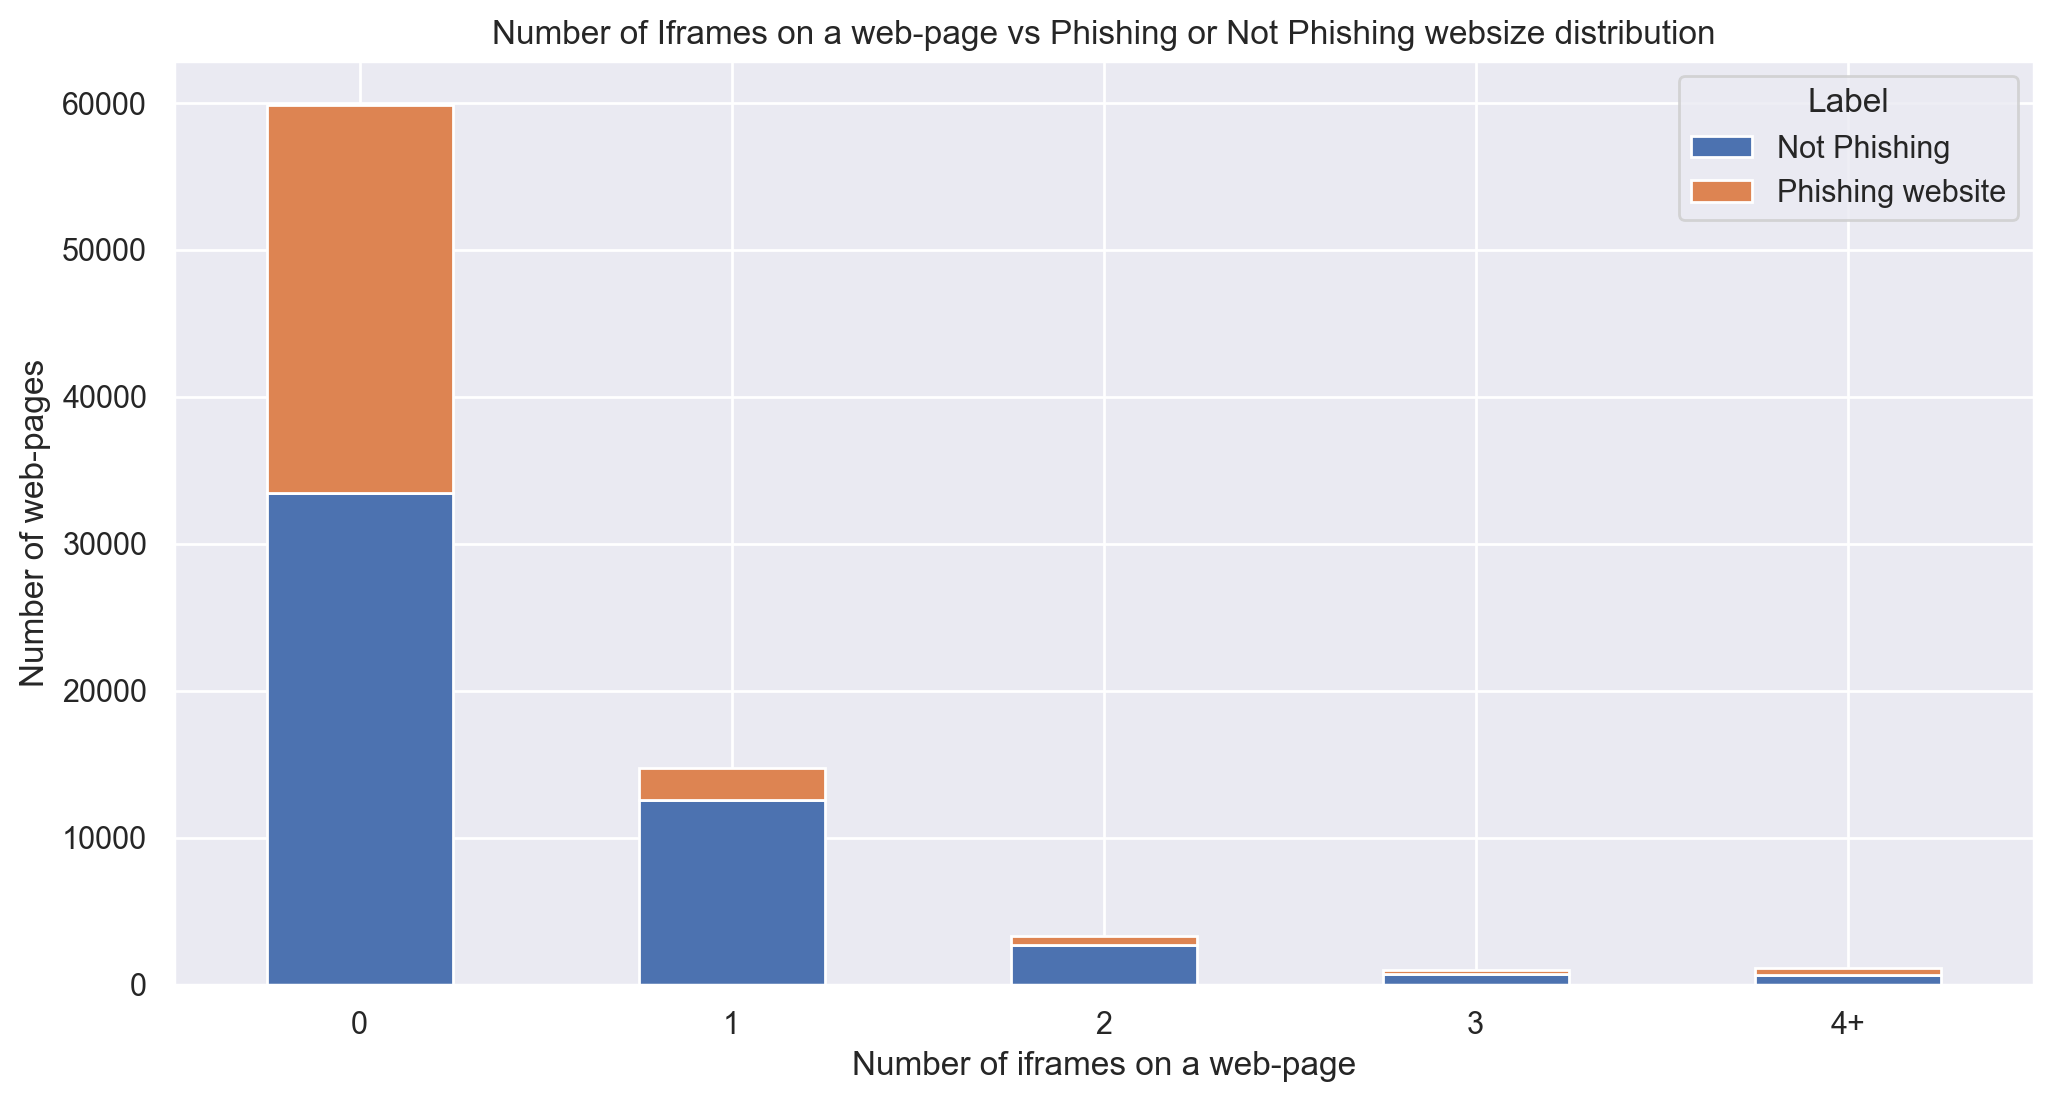

<Figure size 1000x800 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [16]:
plot_grouped_items(df, 'url_length', 
                   limit = 200,
                   bucketSize = 1,
                   x_label = "Length of the URL on a web-page",
                   y_label = "Number of web-pages",
                   title='Number of external links on a web-page vs Phishing or Not Phishing websize distribution',
                   labels = [])


plot_grouped_items(df, 'external_links_count', 
                   limit = 20,
                   bucketSize = 1,
                   x_label = "Number of external links on a web-page",
                   y_label = "Number of web-pages",
                   title='Number of external links on a web-page vs Phishing or Not Phishing websize distribution',
                   labels = [])

plot_grouped_items(df, 'num_img_tags', 
                   x_label = "Number of Images on a web-page",
                   y_label = "Number of web-pages",
                   title='Number of Images on a web-page vs Phishing or Not Phishing websize distribution',
                   labels = [])

plot_grouped_items(df, 'iframes_count', 
                   limit = 5,
                   x_label = "Number of iframes on a web-page",
                   y_label = "Number of web-pages",
                   title='Number of Iframes on a web-page vs Phishing or Not Phishing websize distribution',
                   labels = [])




# Heatmap for all the features

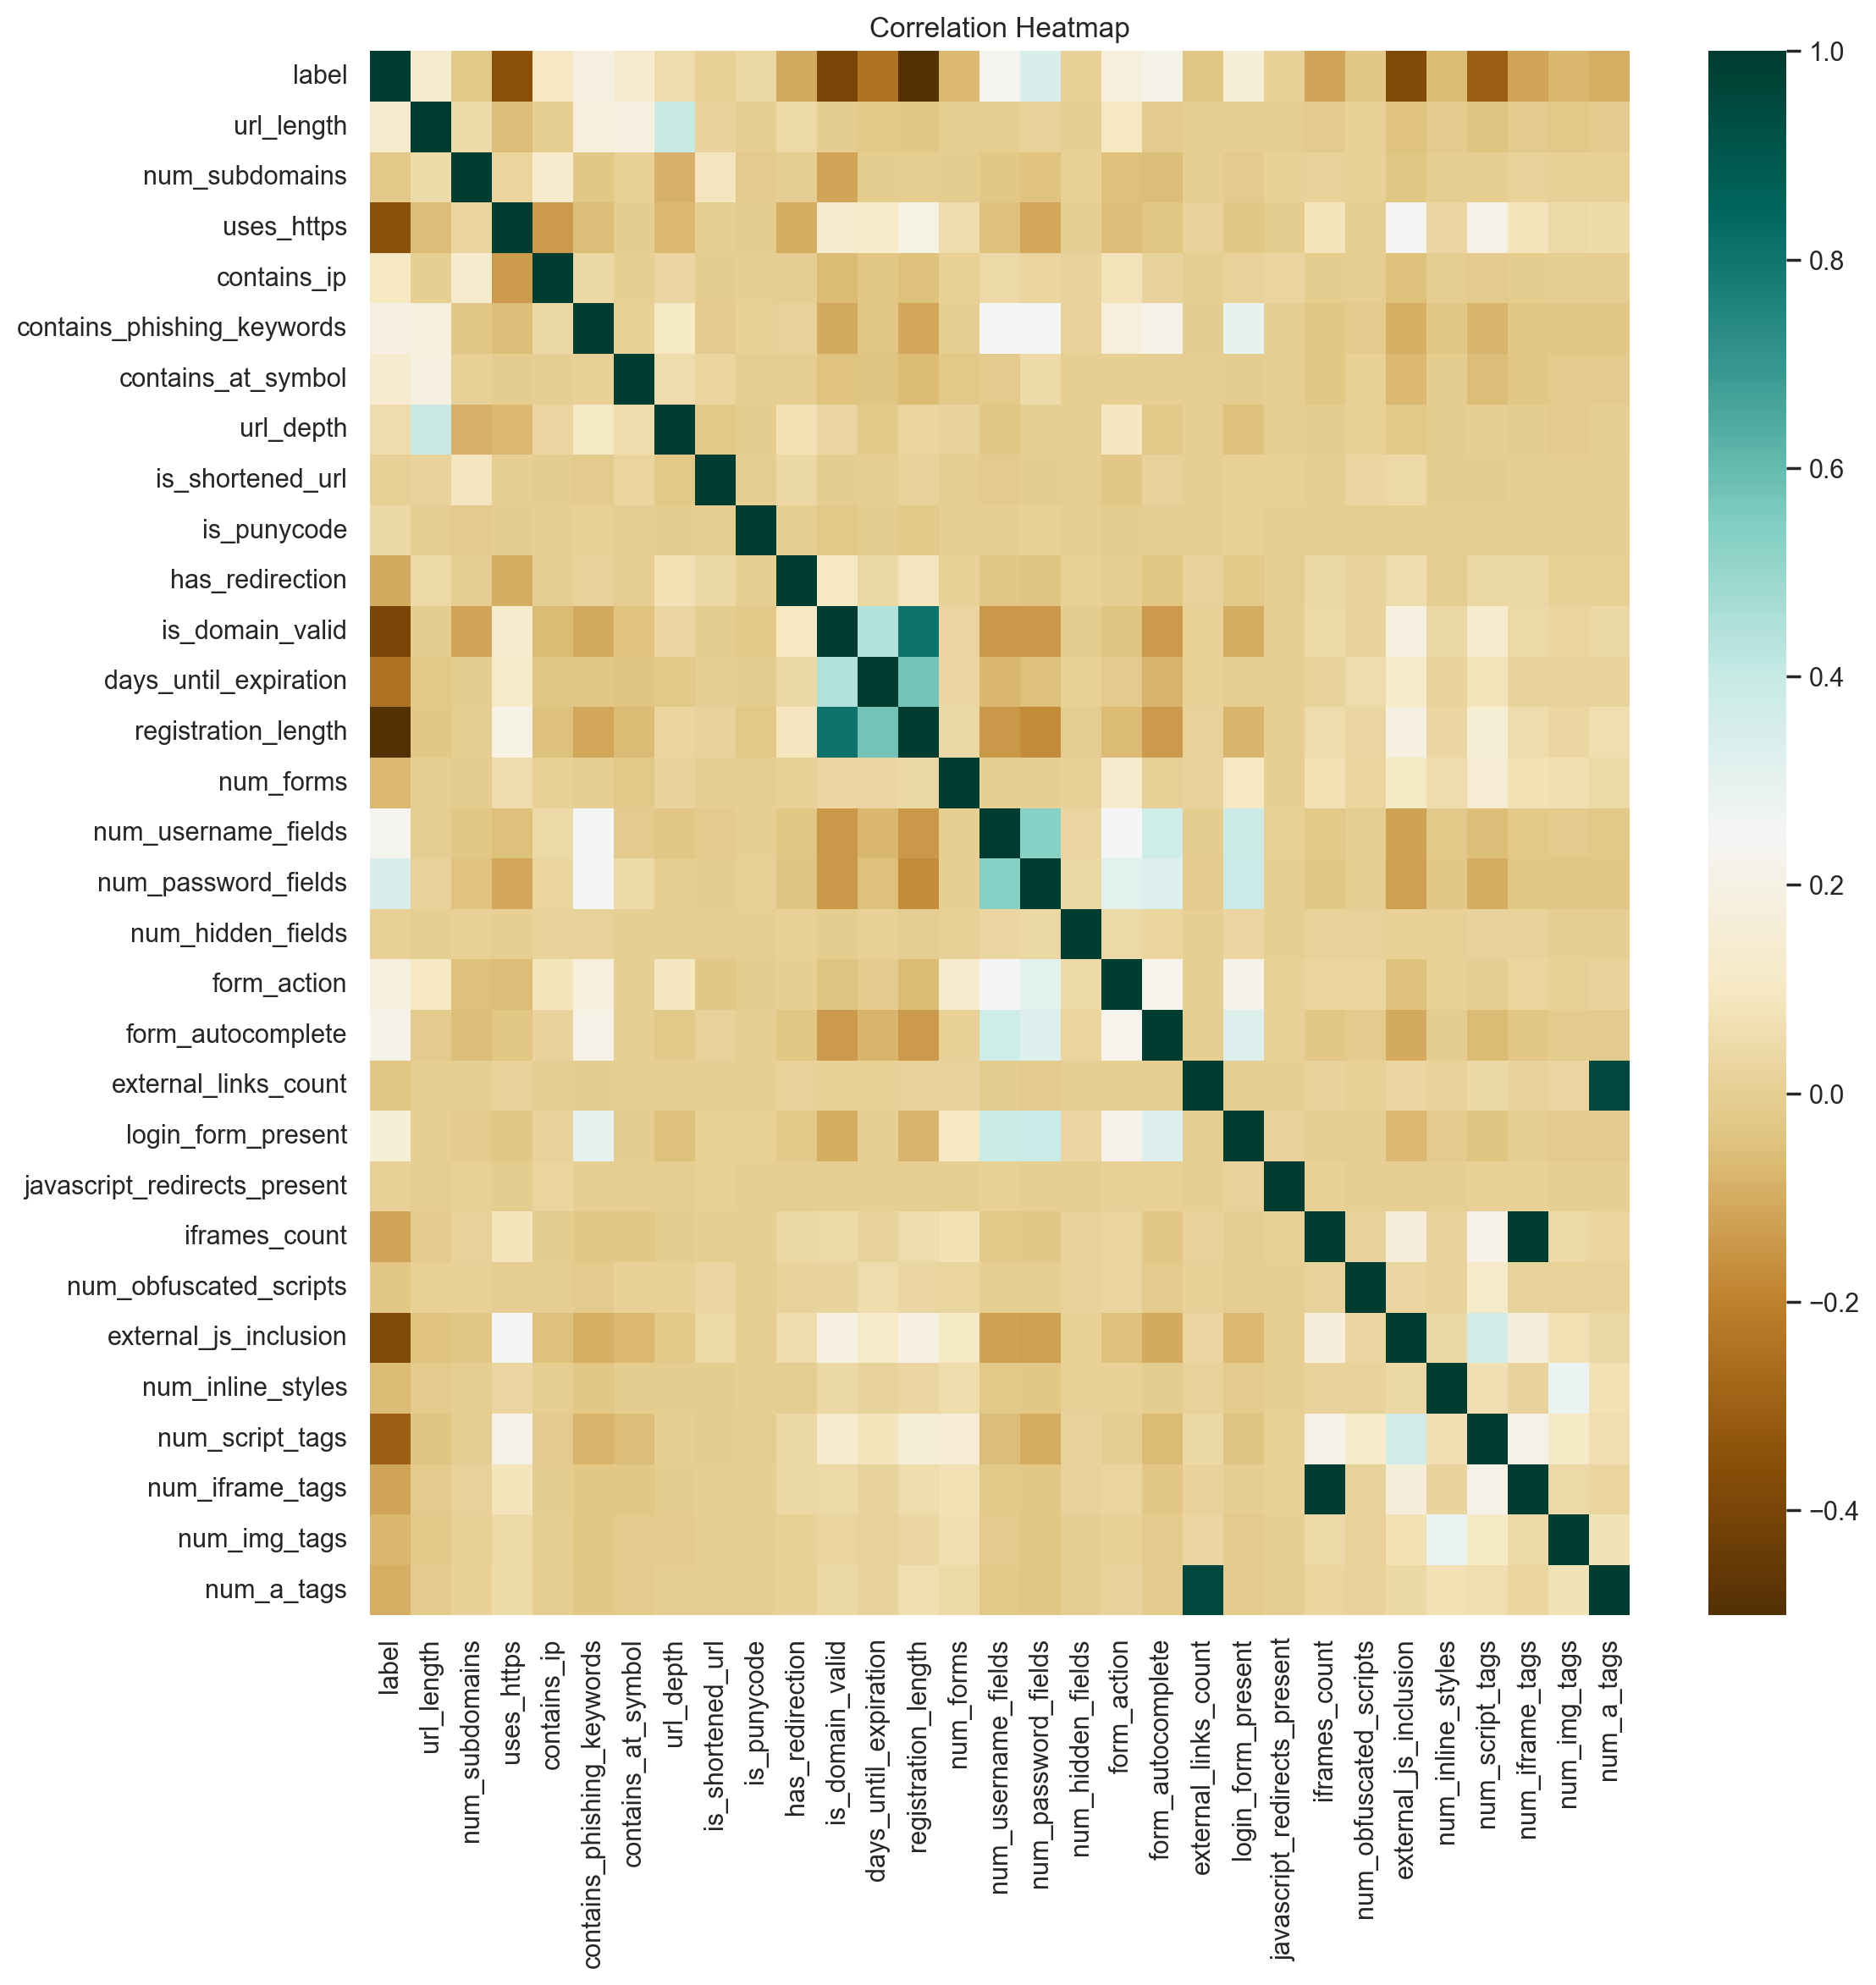

In [17]:
plt.figure(figsize=(12, 12))
df = load_features()
heatmap = sns.heatmap(df.corr(), cmap='BrBG')
plt.savefig('plots/correlation.png', dpi=300, bbox_inches='tight')
heatmap.set_title('Correlation Heatmap');

# Feature Importance

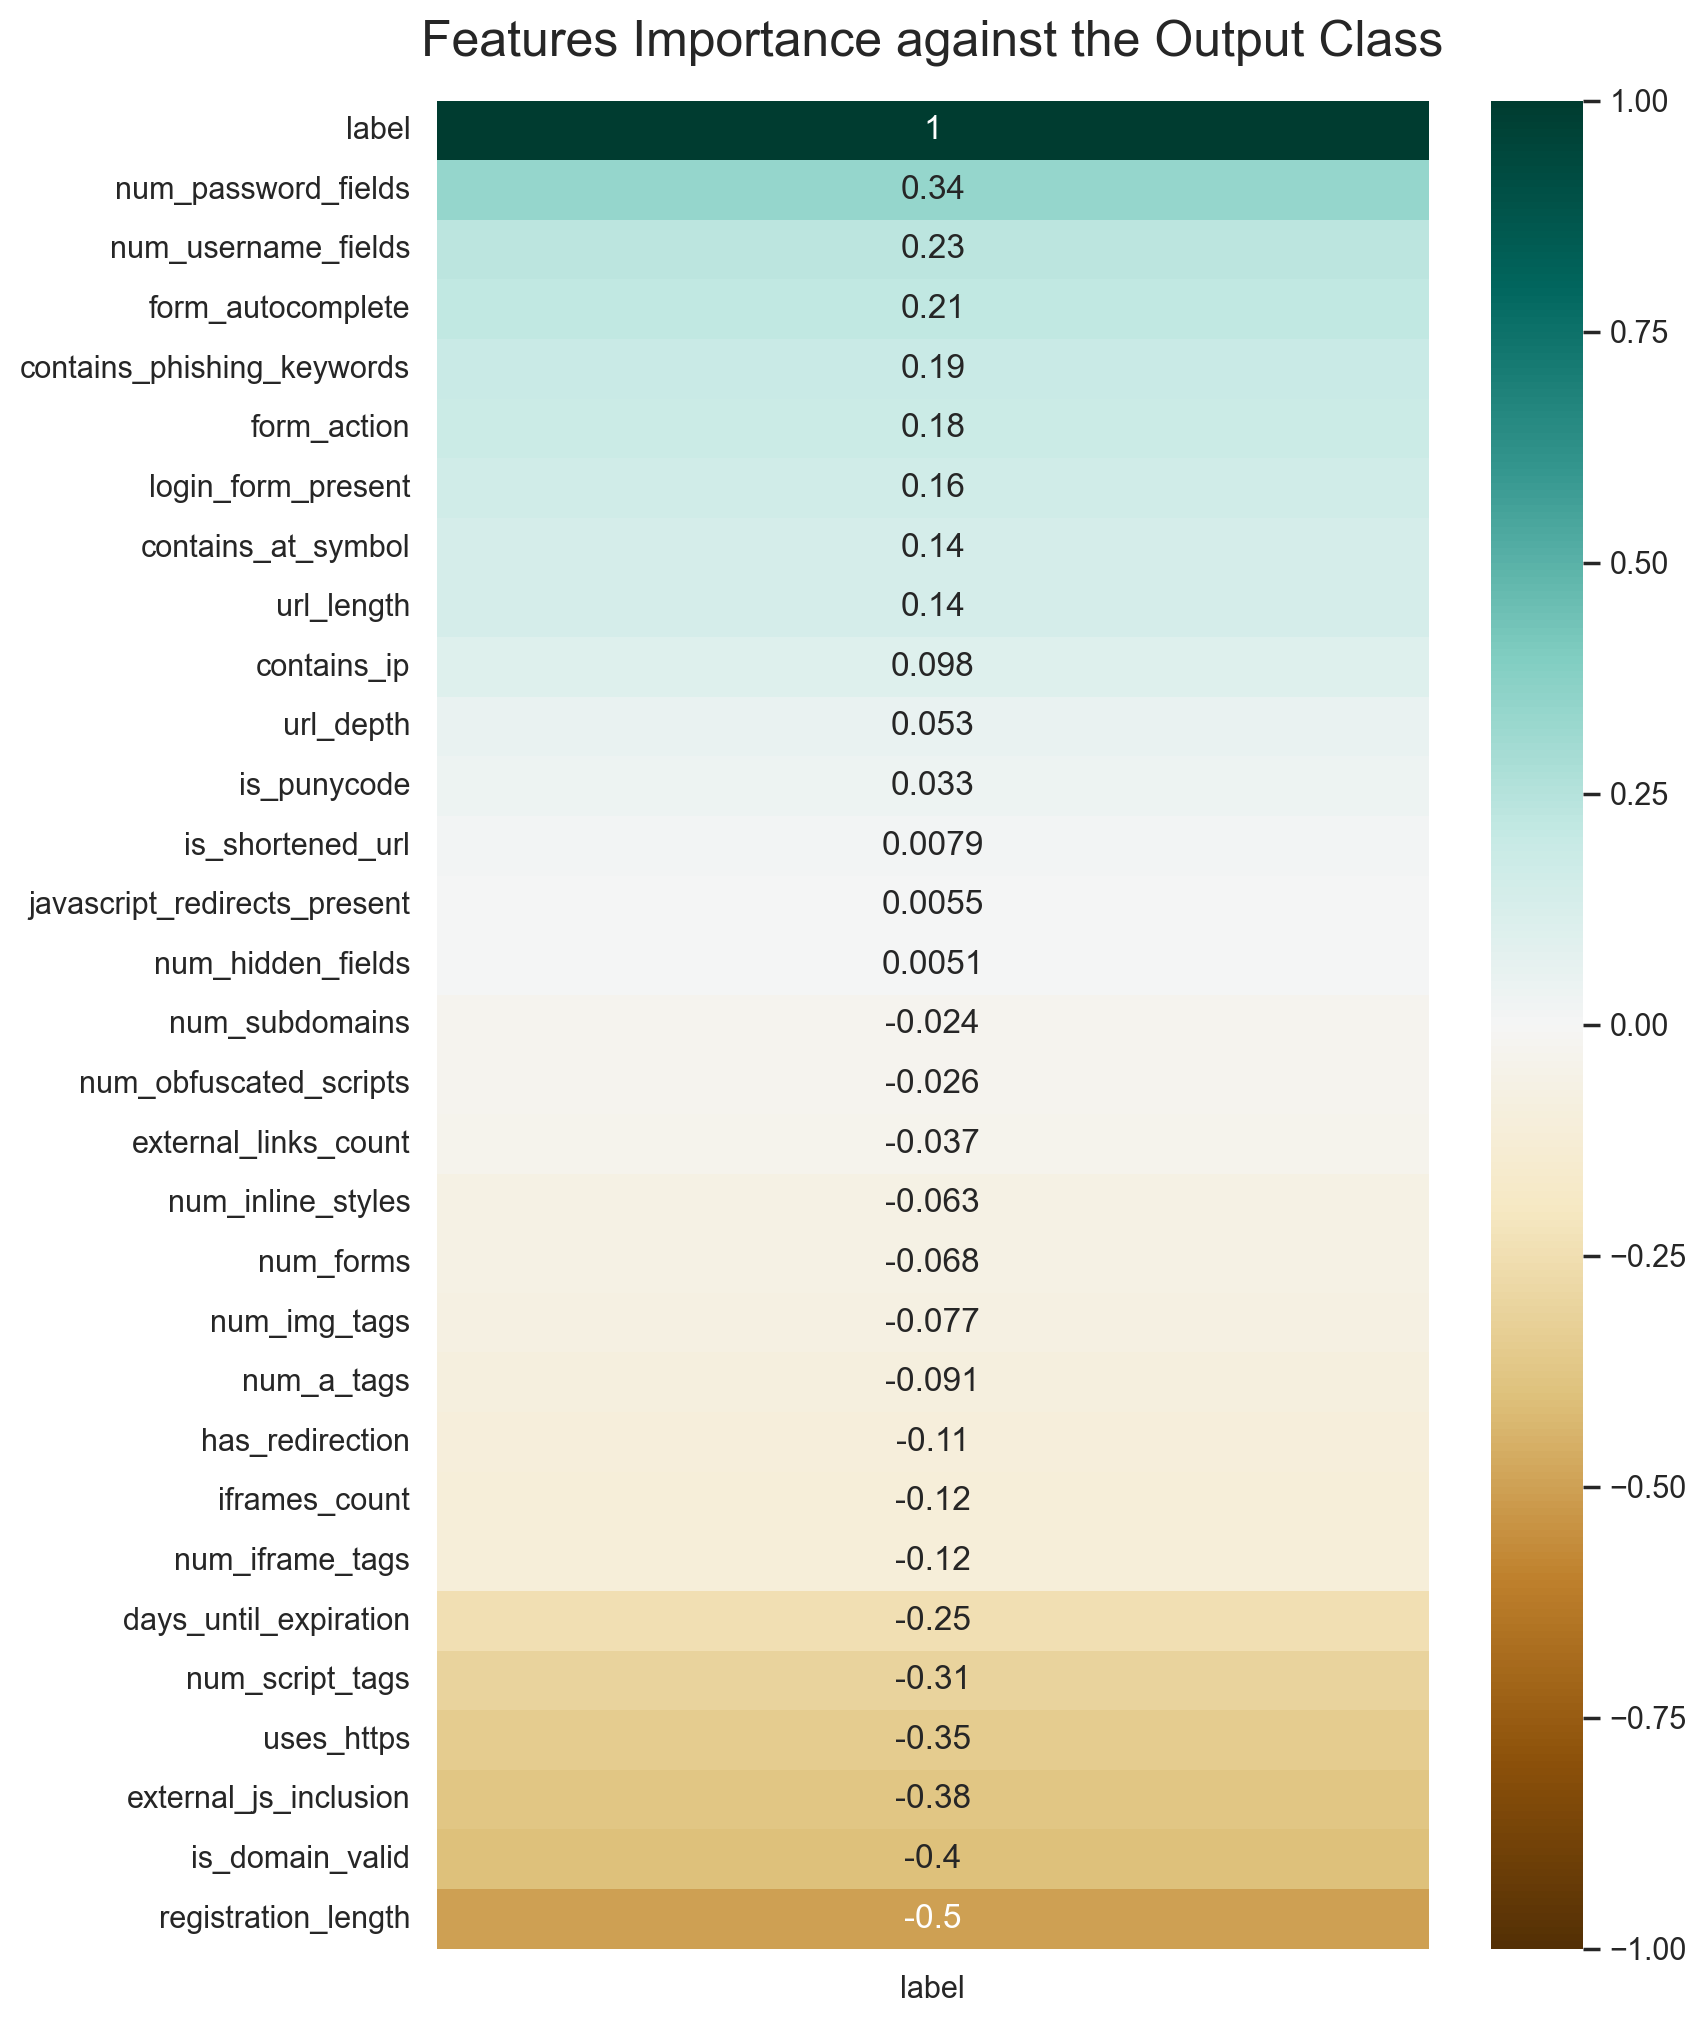

In [18]:
df = load_features()
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['label']].sort_values(by='label', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Importance against the Output Class', fontdict={'fontsize':18}, pad=16);
plt.savefig('plots/feature_importance.png', dpi=300, bbox_inches='tight')


# Form Action Distribution

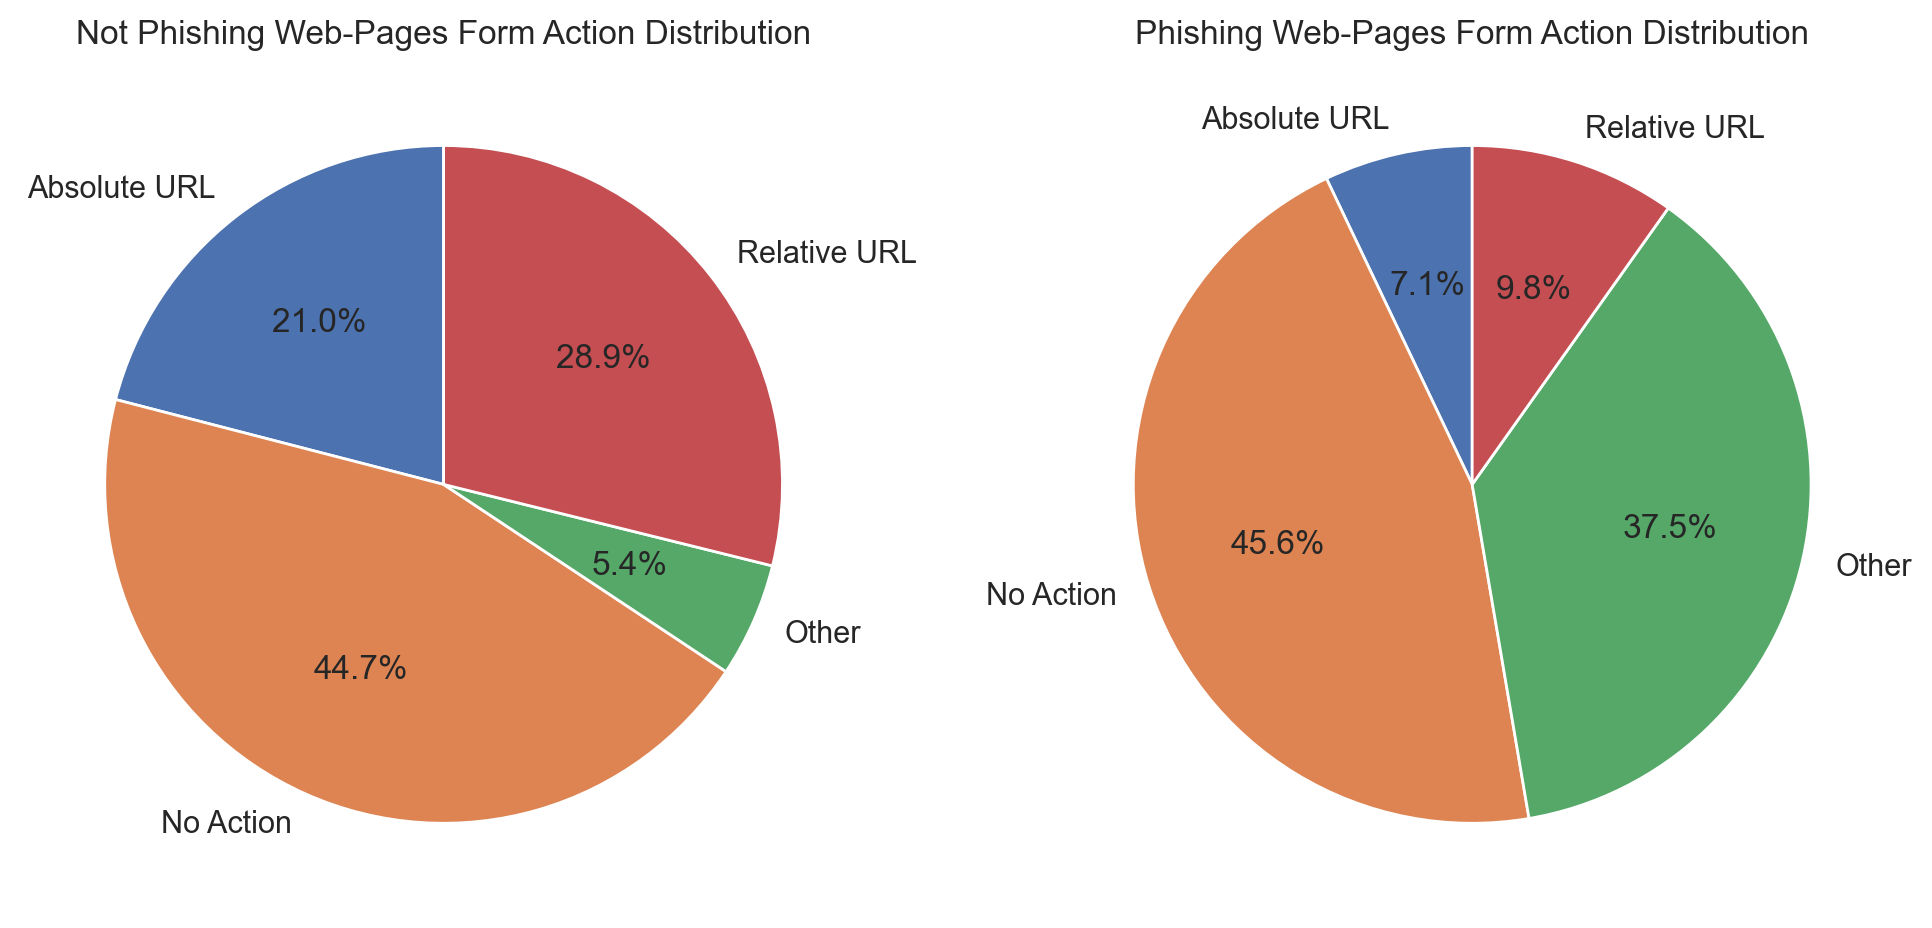

<Figure size 640x480 with 0 Axes>

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame.from_dict(features, orient='index')
df = df[["form_action", "label"]] #.groupby(["form_action", "label"]).value_counts().reset_index()

import pandas as pd
import matplotlib.pyplot as plt

# Count the occurrences of each label and form_action combination
df['form_action'] = df['form_action'].replace(
    {0: 'No Action', 1: 'Absolute URL', 2: 'Relative URL', 3: 'Other'})


label_counts = df.groupby(['label', 'form_action']).size().unstack(fill_value=0)

# Create two pie charts, one for each label
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Pie chart for Label 0
axes[0].pie(label_counts.loc[0], labels=label_counts.columns, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Not Phishing Web-Pages Form Action Distribution')

# Pie chart for Label 1
axes[1].pie(label_counts.loc[1], labels=label_counts.columns, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Phishing Web-Pages Form Action Distribution')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
plt.savefig('plots/form_action_dist.png', dpi=300, bbox_inches='tight')



# Normalization of the data

In [25]:
from sklearn.decomposition import PCA

cont_feats = {
    "url_length",
    "url_depth",
    "days_until_expiration",
    "registration_length",
    "num_forms",
    "num_username_fields",
    "num_password_fields",
    "num_hidden_fields",
    "form_autocomplete",
    "external_links_count",
    "iframes_count",
    "num_obfuscated_scripts",
    "num_inline_styles",
    "num_script_tags",
    "num_iframe_tags",
    "num_img_tags",
    "num_a_tags",
  }
columns = df.columns[1:]
cont_ids = [i for i, c in enumerate(columns) if c in cont_feats]


mean = X_train[:, cont_ids].mean(axis=0, keepdims=True)
std = X_train[:, cont_ids].std(axis=0, keepdims=True)
X_train_norm = X_train.copy()
X_test_norm = X_test.copy()
X_train_norm[:, cont_ids] = (X_train[:, cont_ids] - mean) / std
X_test_norm[:, cont_ids] = (X_test[:, cont_ids] - mean) / std


# Data Analysis

## Normalize continuous features and performa PCA analysis

In [26]:
def plot_pca(X_pca, y, n_components):
    X_list = [X_pca[:, i] for i in range(n_components)]
    
    if len(X_list) == 3:
        ax = plt.axes(projection='3d')
    else:
        ax = plt.axes() 
    ax.scatter(*X_list, c=y, cmap='RdYlBu')
    ax.set_title(f'Distribution of data using PCA with {n_components = }')
    plt.show()
    plt.close()

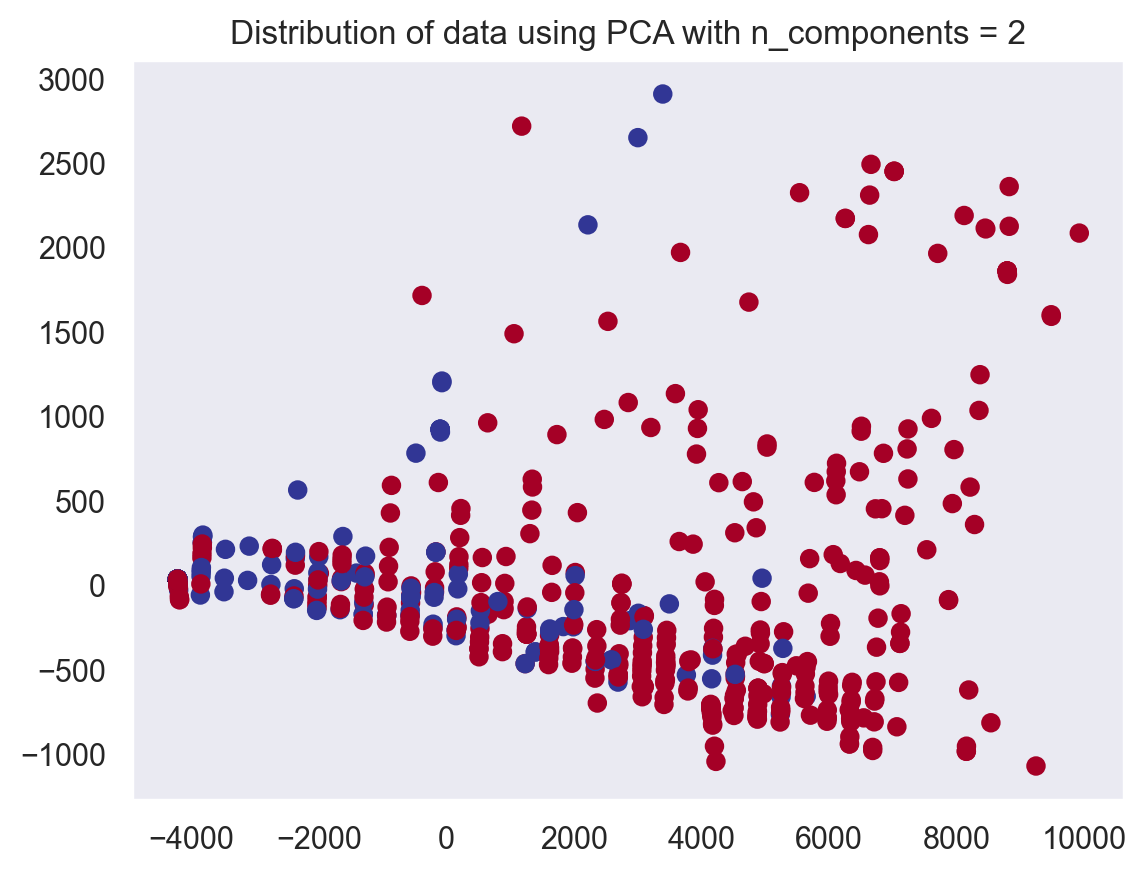

In [27]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train_norm)
X_train_pca = pca.transform(X_train_norm)
X_test_pca = pca.transform(X_test_norm)
        
plot_pca(X_train_pca, y_train, n_components=2)

# Scree Plot for the PCA

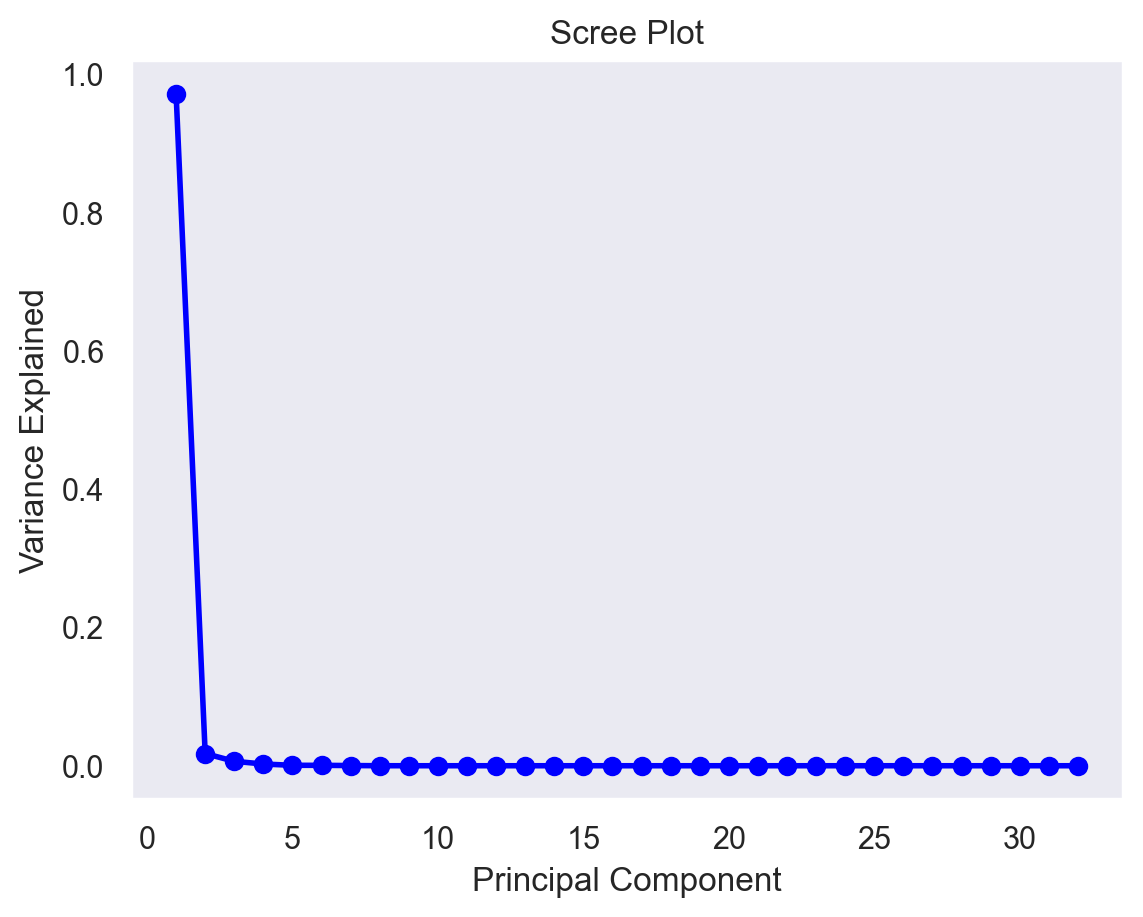

In [28]:
x_ticks = np.arange(pca.n_components_) + 1
plt.plot(x_ticks, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

# Spider Chart 

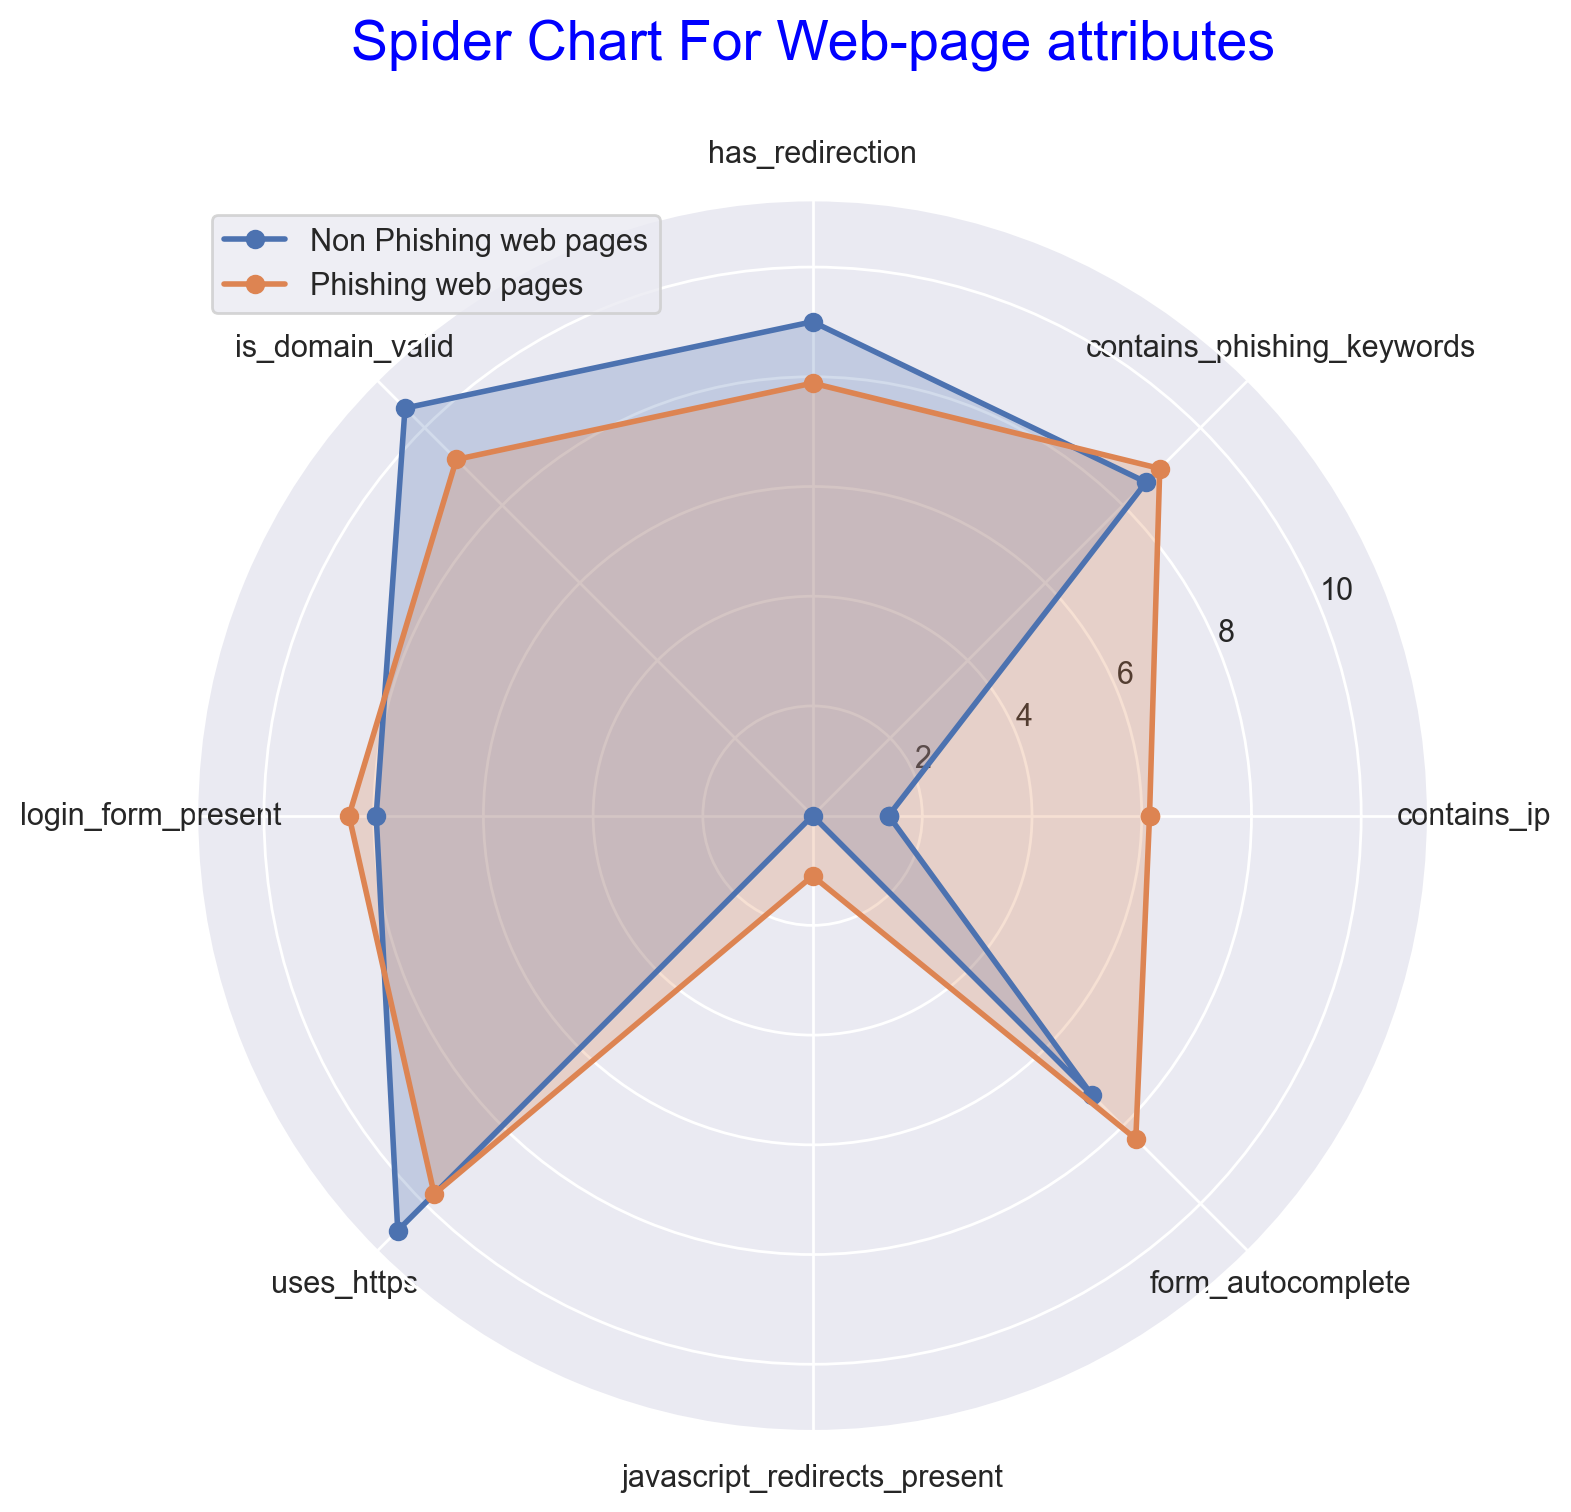

In [29]:
import math

df = pd.DataFrame.from_dict(features, orient='index')


categories = ["contains_ip", "contains_phishing_keywords", 
              "has_redirection", "is_domain_valid",  "login_form_present",
             "uses_https", "javascript_redirects_present", "form_autocomplete"]


values_dataset1, values_dataset2 = [], []
for c in categories:
    values_dataset1.append(math.log(df[(df['label'] == 1) & (df[c] == True) ].shape[0]))
    values_dataset2.append(math.log(df[(df['label'] == 0) & (df[c] == True) ].shape[0]))

# Number of categories
num_categories = len(categories)

# Calculate angle for each category
angles = np.linspace(0, 2 * np.pi, num_categories, endpoint=False).tolist()

# Repeat the first value to close the circle
values_dataset1 += values_dataset1[:1]
values_dataset2 += values_dataset2[:1]
angles += angles[:1]

plt.figure(figsize=(8, 8))

# Create a spider chart for Dataset 2
plt.polar(angles, values_dataset2, marker='o', linestyle='solid', linewidth=2, label='Non Phishing web pages')
plt.fill(angles, values_dataset2, alpha=0.25)

# Create a spider chart for Dataset 1
plt.polar(angles, values_dataset1, marker='o', linestyle='solid', linewidth=2, label='Phishing web pages')
plt.fill(angles, values_dataset1, alpha=0.25)


# Set labels for each category
plt.xticks(angles[:-1], categories)

# Set the title of the plot
plt.title('Spider Chart For Web-page attributes', size=20, color='blue', y=1.1)

# Display legend
plt.legend(loc='upper left')
plt.savefig('plots/spider_chart_log.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

# Violin Chart

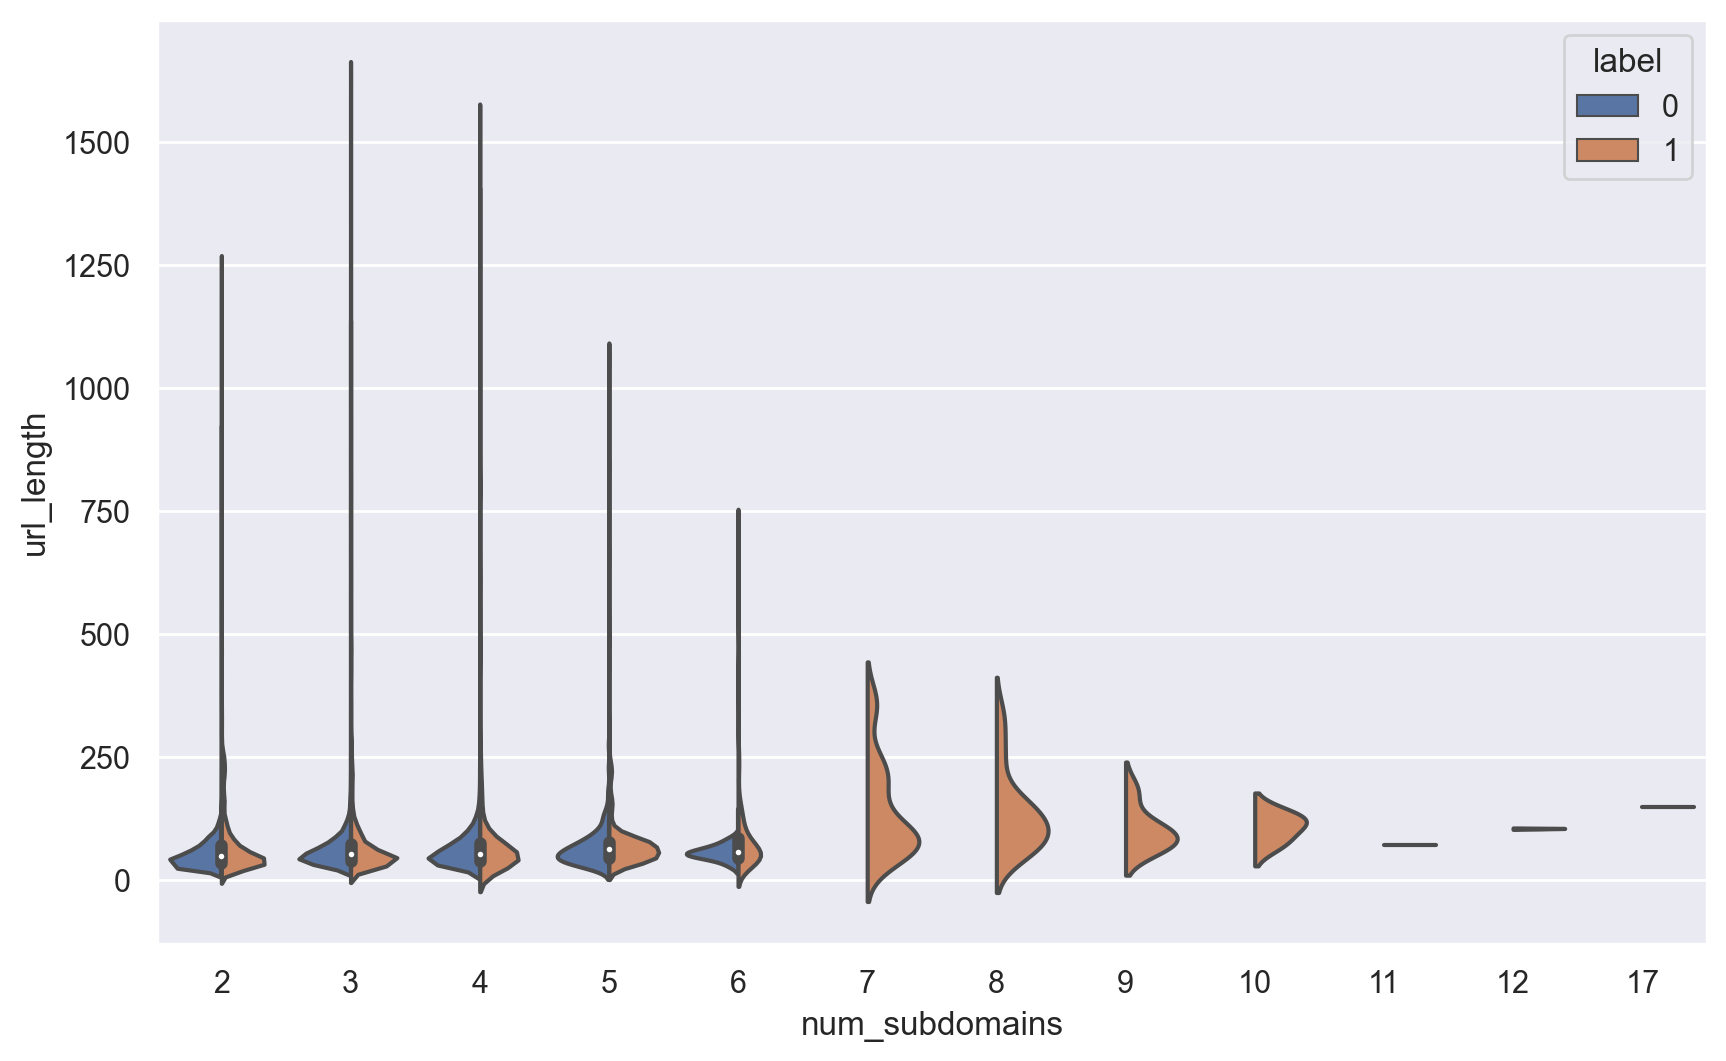

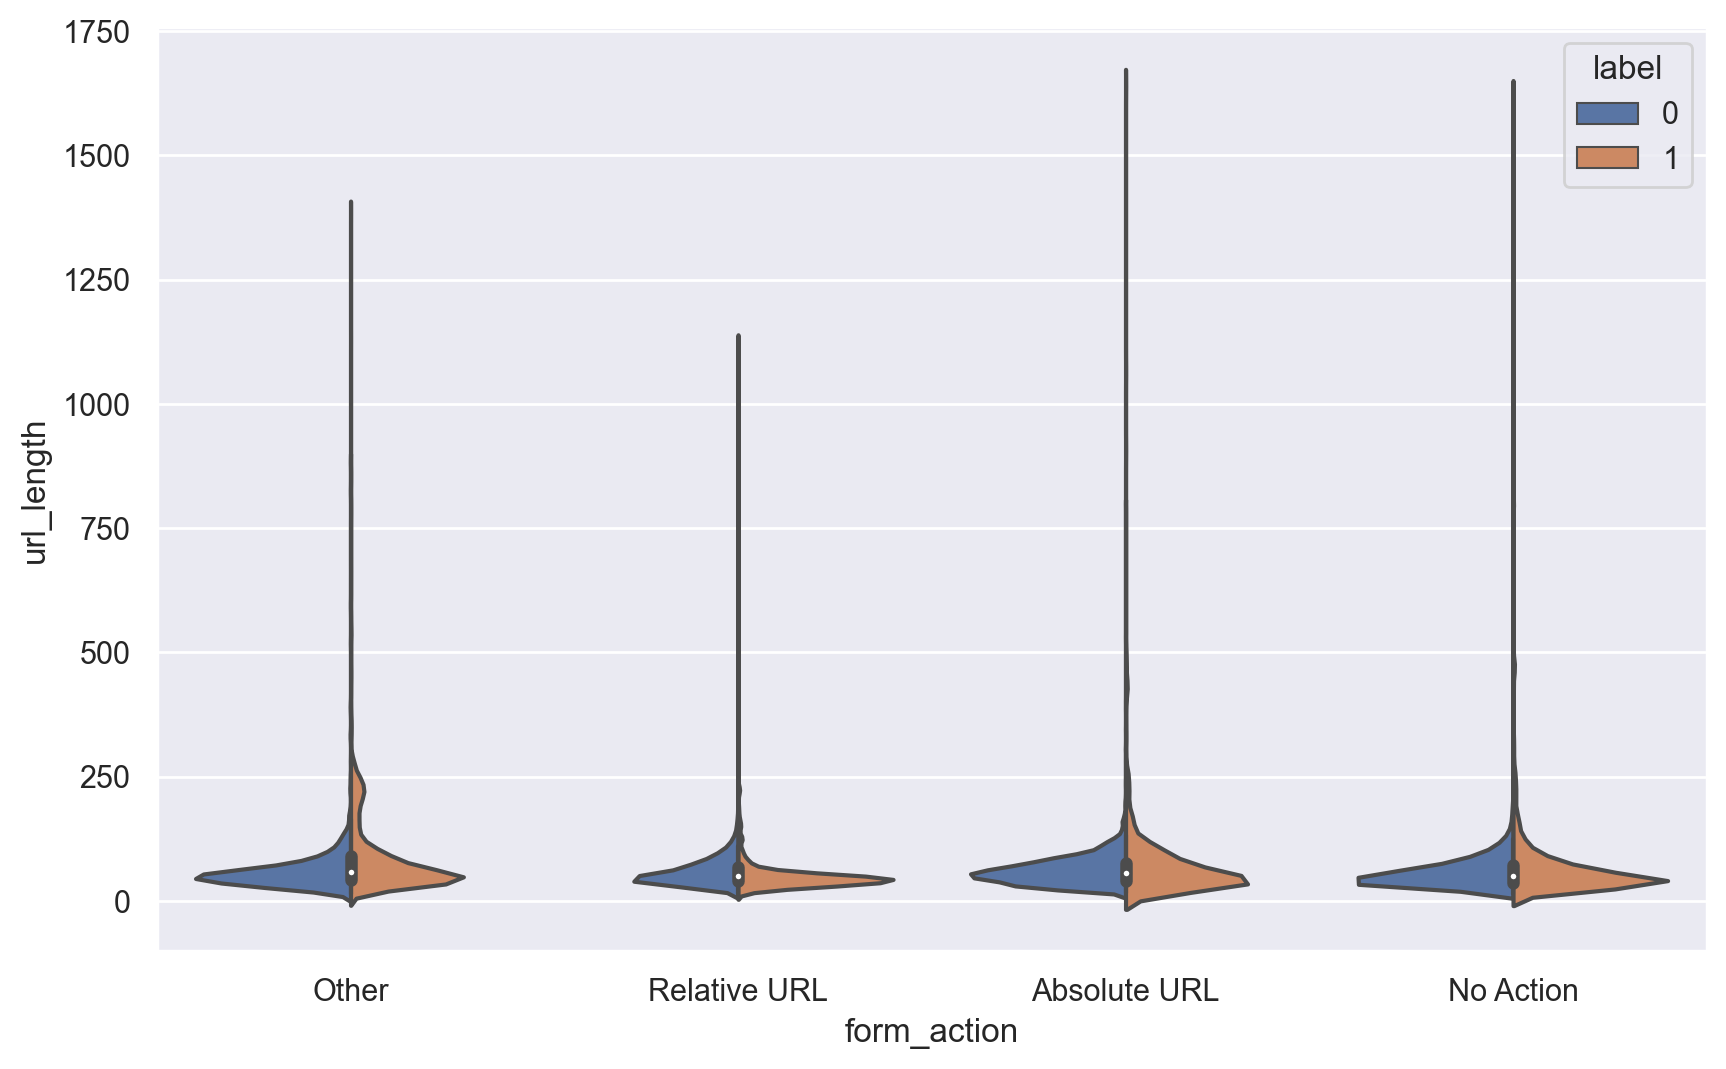

In [30]:
def create_violin_cahrt(df, x, y):
    df = df[[x, y, "label"]]
    
    plt.figure(figsize=(10,6))
    plt.grid(True)
    # plt.yscale('log')

    # Draw a nested violinplot and split the violins for easier comparison
    sns.violinplot(data=df, x=x, y=y, hue="label", split=True)
    plt.savefig(f'plots/violin_plot_{x}_{y}.png', dpi=300, bbox_inches='tight')

    
df = load_features()
create_violin_cahrt(df, "num_subdomains", "url_length")
df['form_action'] = df['form_action'].replace({0: 'No Action', 1: 'Absolute URL', 2: 'Relative URL', 3: 'Other'})
create_violin_cahrt(df, "form_action", "url_length")

# Scatter Plot with Trendline

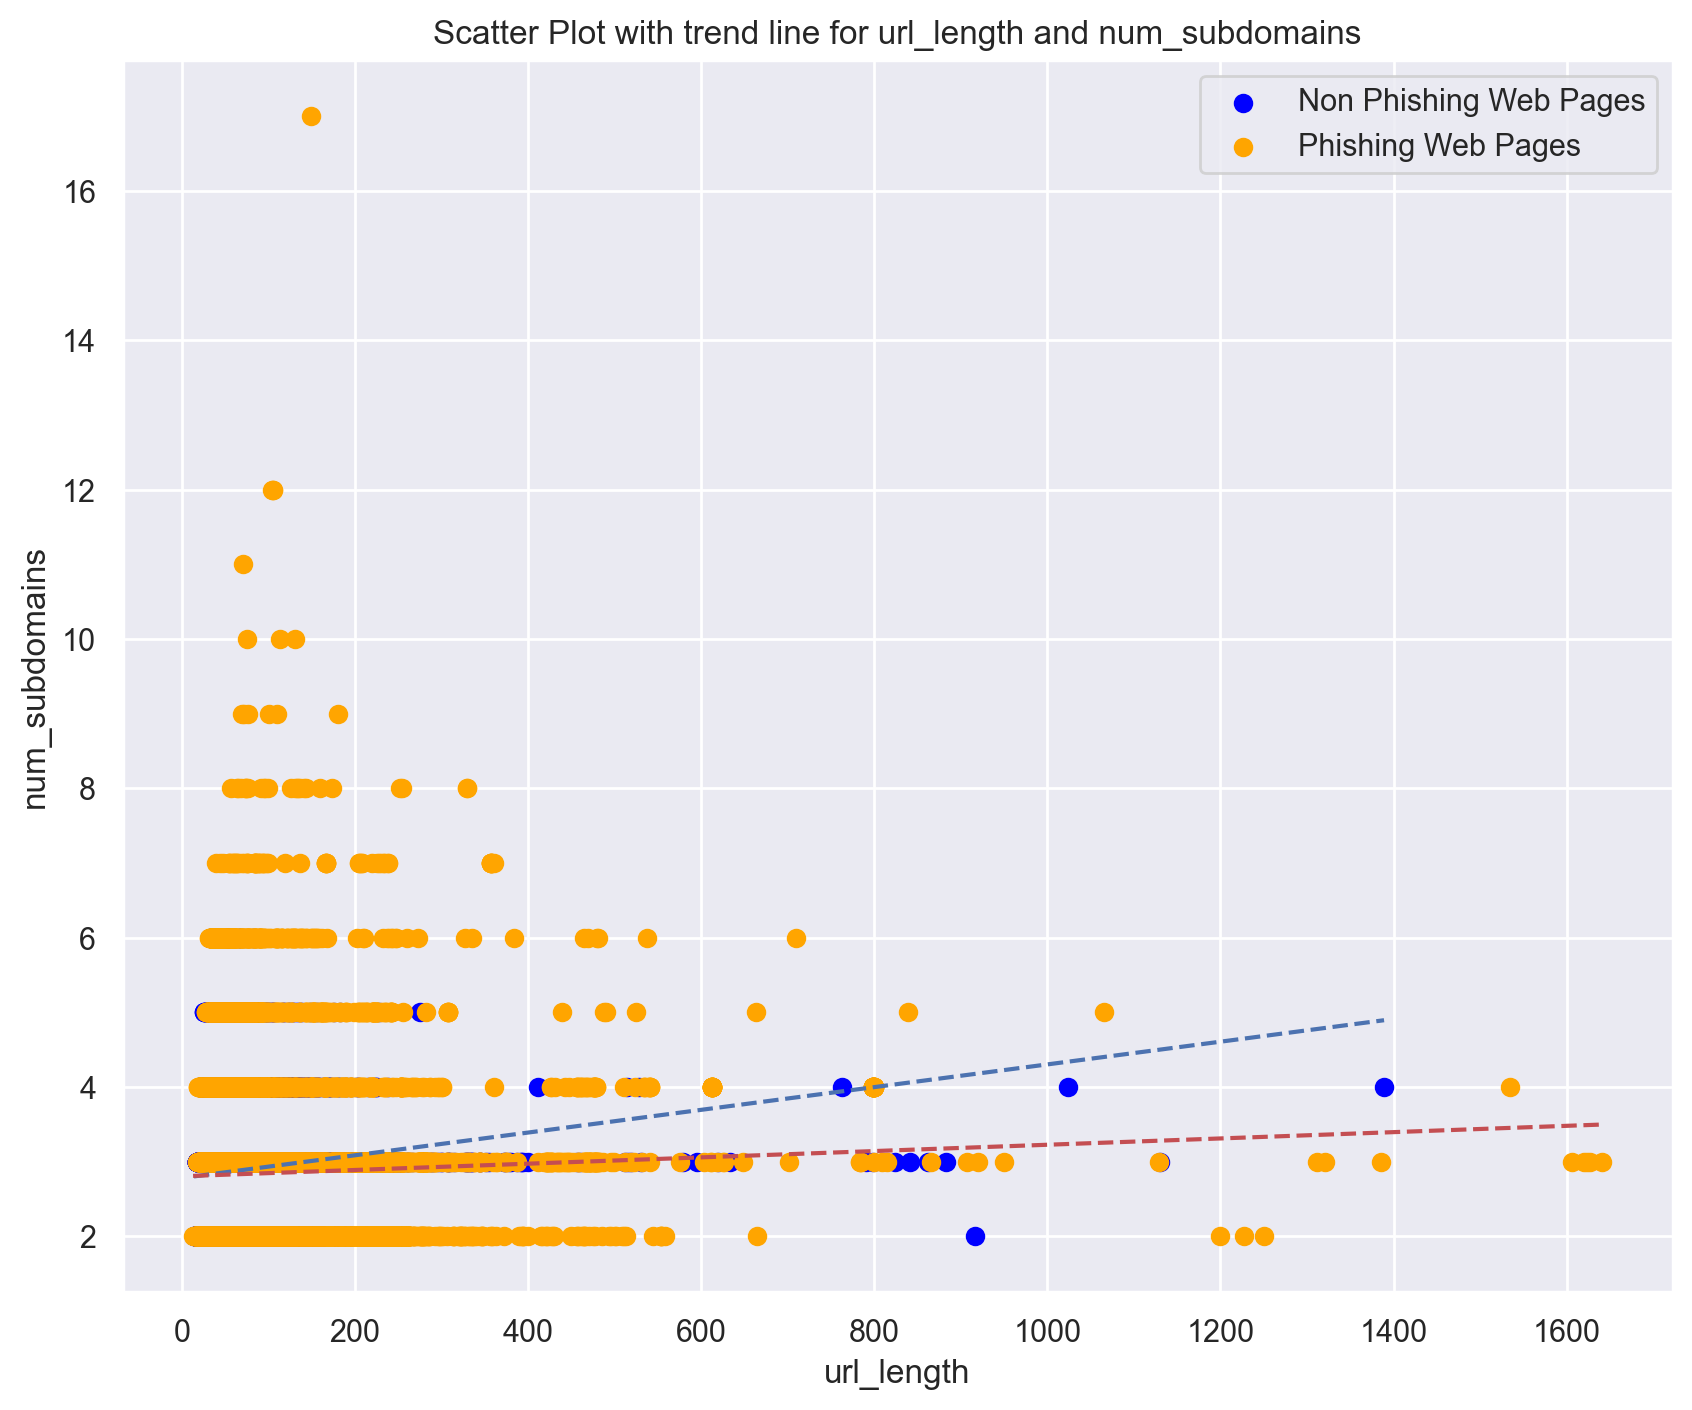

<Figure size 640x480 with 0 Axes>

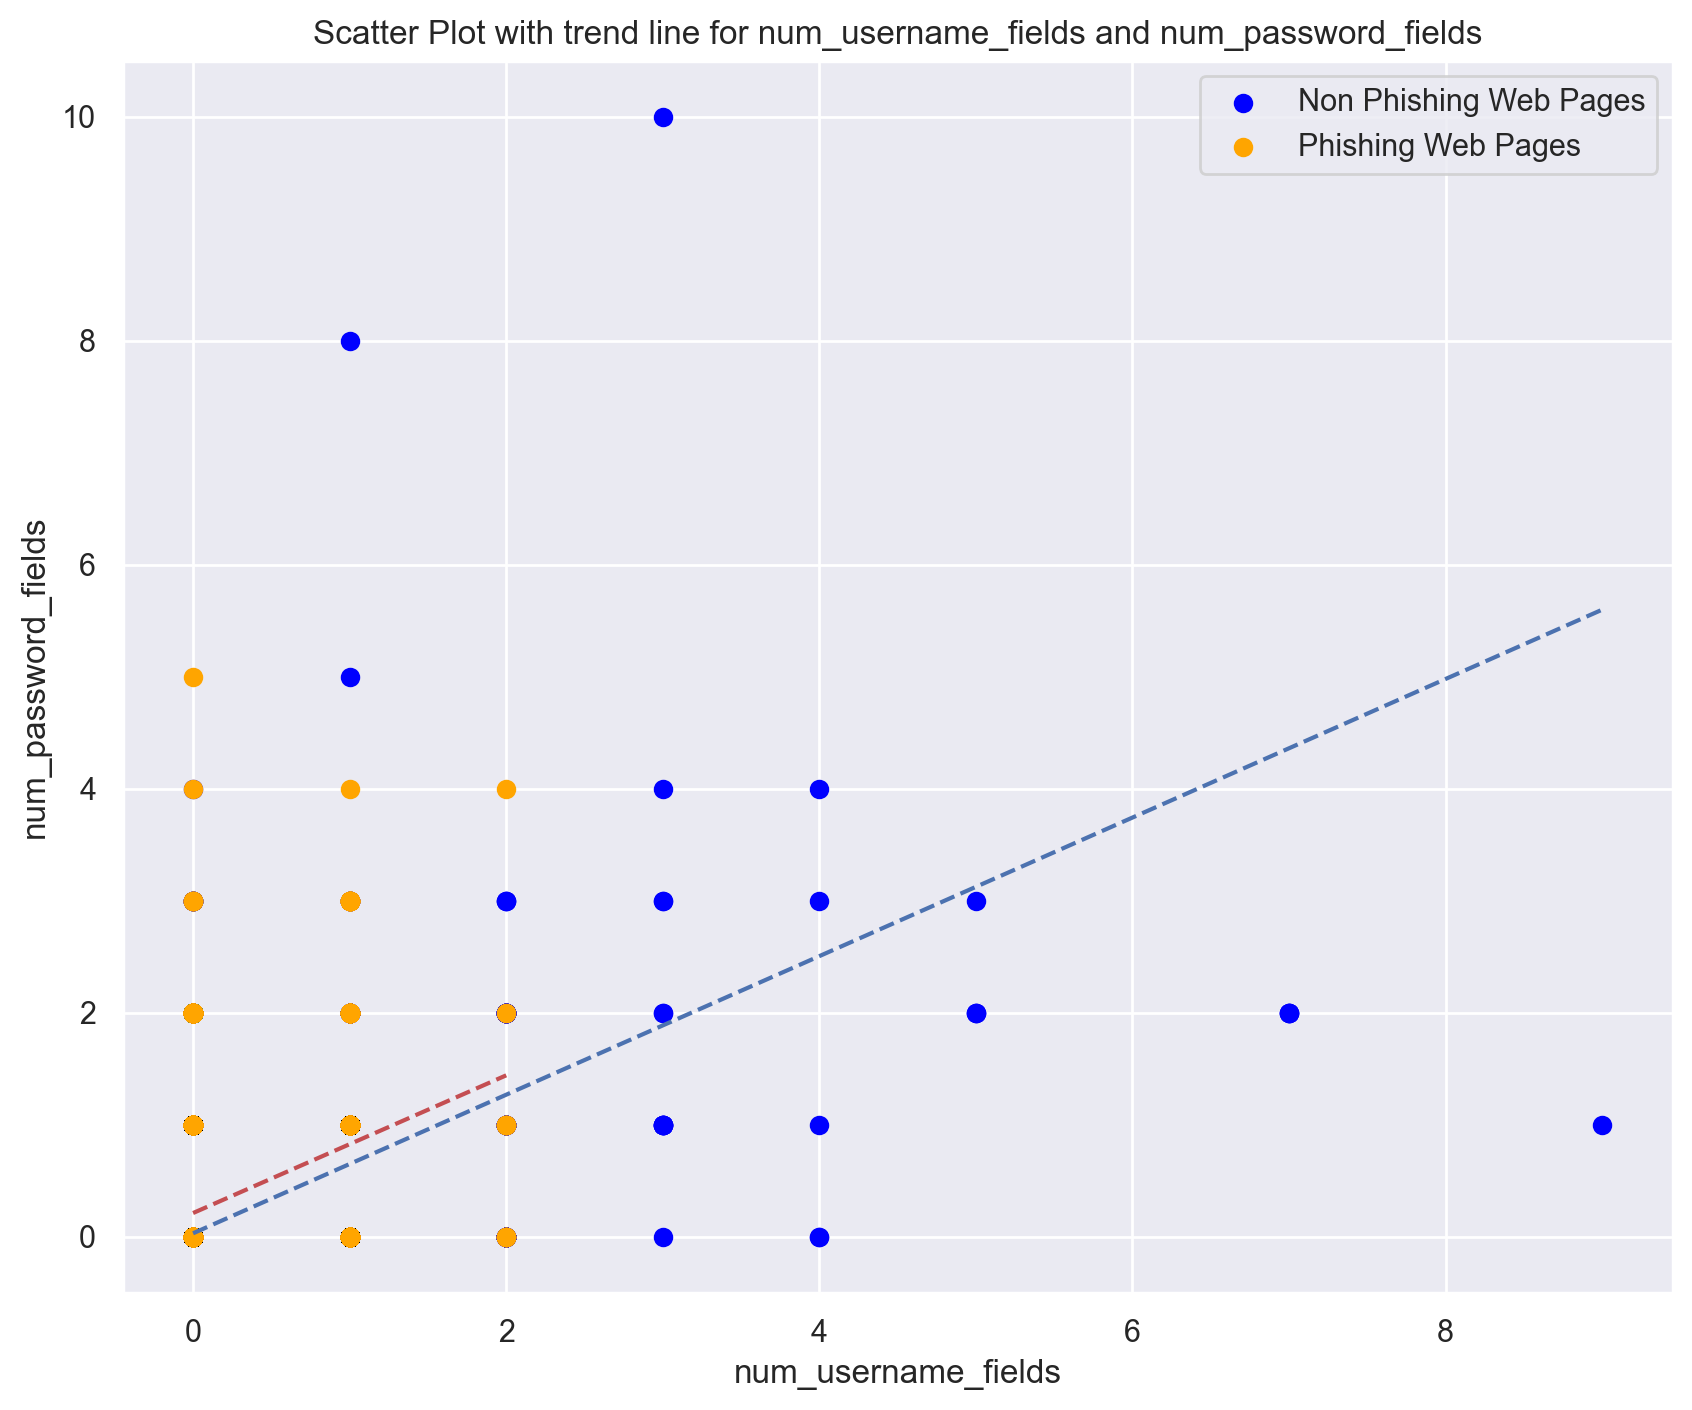

<Figure size 640x480 with 0 Axes>

In [32]:
def scatter_plot_with_trendline(df, x, y, is_log=False):
    
    plt.figure(figsize=(10, 8))

    # Separate the data into two classes
    class_0 = df[df['label'] == 0].sort_values(by=x)
    class_1 = df[df['label'] == 1].sort_values(by=x)

    
    # Plot points for class 0
    plt.scatter(class_0[x], class_0[y], color='blue', label='Non Phishing Web Pages')

    # Plot points for class 1
    plt.scatter(class_1[x], class_1[y], color='orange', label='Phishing Web Pages')
    
    # Fit a line to the data for class 0 and plot it
    z = np.polyfit(class_0[x], class_0[y], 1)
    p = np.poly1d(z)
    plt.plot(class_0[x], p(class_0[x]), "b--")
    
    # Fit a line to the data for class 1 and plot it
    z = np.polyfit(class_1[x], class_1[y], 1)
    p = np.poly1d(z)
    plt.plot(class_1[x], p(class_1[x]), "r--")

    if is_log:
        plt.xscale('log', basex=2)
        plt.yscale('log', basey=2)
    
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'Scatter Plot with trend line for {x} and {y}')
    plt.legend()
    plt.grid(True)    
    fig1 = plt.gcf()
    plt.show()
    plt.draw()
    fig1.savefig(f'plots/scatter_plot_with_trendline_{x}_{y}.png', dpi=300, bbox_inches='tight')
    
scatter_plot_with_trendline(df, 'url_length', 'num_subdomains')

scatter_plot_with_trendline(df, 'num_username_fields', 'num_password_fields')


# Box Plots for the features

<Figure size 1400x800 with 0 Axes>

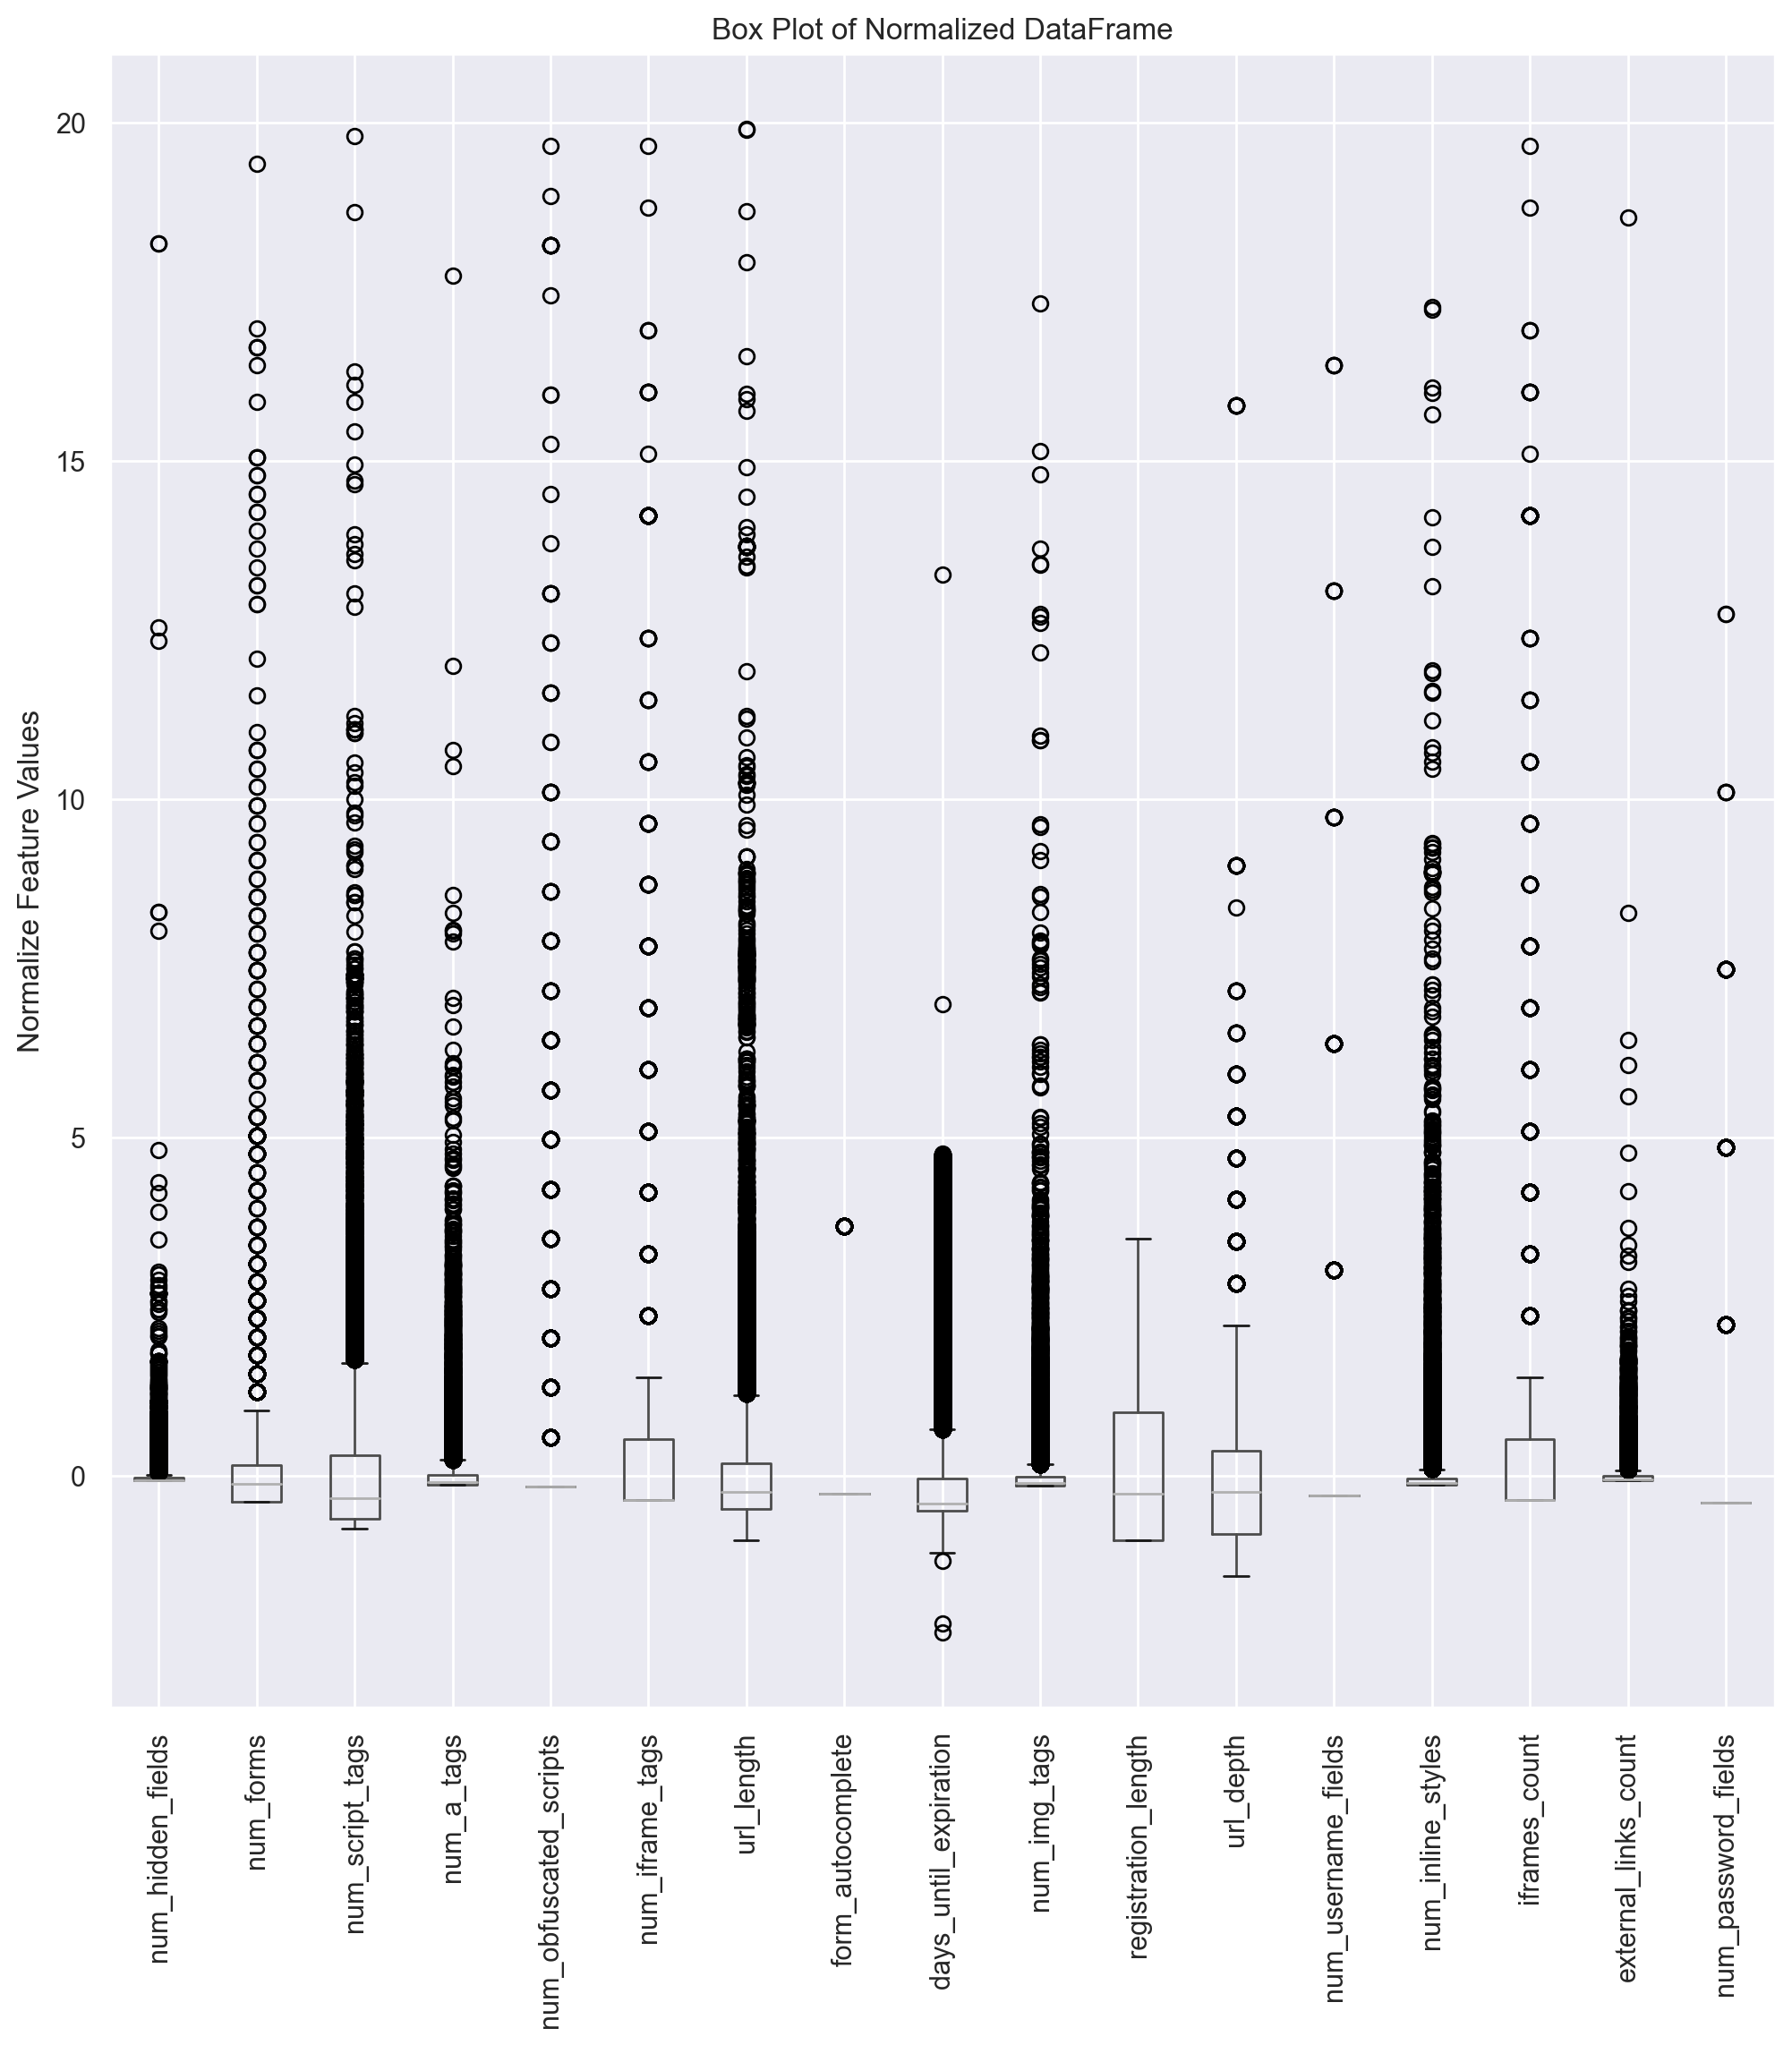

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# # Sample data
# data = {
#     'Feature1': [10, 15, 7, 20, 12],
#     'Feature2': [30, 45, 21, 60, 36],
#     'Feature3': [5, 8, 4, 12, 6]
# }

# # Creating a pandas DataFrame
# df = pd.DataFrame(data)

cont_feats = {
    "url_length",
    "url_depth",
    "days_until_expiration",
    "registration_length",
    "num_forms",
    "num_username_fields",
    "num_password_fields",
    "num_hidden_fields",
    "form_autocomplete",
    "external_links_count",
    "iframes_count",
    "num_obfuscated_scripts",
    "num_inline_styles",
    "num_script_tags",
    "num_iframe_tags",
    "num_img_tags",
    "num_a_tags",
  }

# Set the resolution for inline plotting
%config InlineBackend.figure_format = 'retina'
plt.figure(figsize=(14, 8))

df = df[list(cont_feats)].sample(64000)

# Normalize the DataFrame using StandardScaler
scaler = StandardScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)



# Create a box plot for the normalized DataFrame
plt.figure(figsize=(12, 12))
# plt.yscale('log')

filtered_df = normalized_df[normalized_df < 20]

ax = filtered_df.boxplot()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90) 
plt.title('Box Plot of Normalized DataFrame')
plt.ylabel('Normalize Feature Values')
plt.show()

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig(f'plots/standardize_feature_box_plot.png', dpi=300, bbox_inches='tight')

